In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install transformers
# !pip install pyspellchecker
# !pip install Keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 83.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from transformers import BertTokenizer
from transformers import TFBertModel
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from spellchecker import SpellChecker
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from prettytable import PrettyTable
import time

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Preprocessed_df.csv')
df.head()

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
0               4               4             NaN              8   
1               5               4             NaN              9   
2               4               3             NaN              7   
3               5               5             NaN             10   
4               4               4             NaN              8   

   rater1_domain2  rater2_domain2  domain2_score  ...  word_len  chars_len  \
0             NaN             NaN            NaN  ...       386       1875   
1             NaN             NaN            NaN  ...       464       2288   
2             NaN             NaN            NaN  ...       313       1541   
3             NaN             NaN            NaN  ...       611       3165   
4             NaN             NaN            NaN  ...       517       2569   

   avg_word_length  avg_sentence_length  \
0         3.984456                  1.0   
1         4.030172                  1.0   
2         4.035144                  1.0   
3         4.328969                  1.0   
4         4.071567                  1.0   

                                          pos_ratios  num_sentences  \
0  {'NNP': 0.031088082901554404, 'JJ': 0.05181347...             16   
1  {'NNP': 0.03879310344827586, ',': 0.0258620689...             20   
2  {'NNP': 0.04153354632587859, ',': 0.0287539936...             14   
3  {'NNP': 0.11620294599018004, ',': 0.0212765957...             27   
4  {'NNP': 0.017408123791102514, ',': 0.025145067...             30   

   num_paragraphs  sentiment_polariy  sentiment_subjectivity  \
0               1           0.310471                0.385613   
1               1           0.274000                0.613167   
2               1           0.340393                0.498657   
3               1           0.266828                0.441795   
4               1           0.199684                0.485814   

                                   preprocessed_text  
0  dear local newspaper think effect computer peo...  
1  dear believe using computer benefit u many way...  
2  dear people use computer everyone agrees benef...  
3  dear local newspaper found many expert say com...  
4  dear know computer positive effect people comp...  

[5 rows x 38 columns]

In [6]:
def calc_precision(y_true, y_pred, average='macro'):
    """
    Calculates the precision score between the true and predicted values
    """
    precision = precision_score(y_true, y_pred, average=average)
    return precision

def calc_recall(y_true, y_pred, average='macro'):
    """
    Calculates the recall score between the true and predicted values
    """
    recall = recall_score(y_true, y_pred, average=average)
    return recall

def calc_f1_score(y_true, y_pred, average='macro'):
    """
    Calculates the f1-score between the true and predicted values
    """
    f1 = f1_score(y_true, y_pred, average=average)
    return f1

def calc_cohen_kappa_score(y_true, y_pred):
    """
    Calculates the cohen kappa score between the true and predicted values
    """
    kappa_score = cohen_kappa_score(y_true, y_pred, weights = 'quadratic')
    return kappa_score

def calc_accuracy(y_true, y_pred):
    """
    Calculates the accuracy score between the true and predicted values
    """
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

In [7]:
def print_metrics_function(y_actual, y_predictions):
    
    # Calculate and print accuracy
    accuracy = calc_accuracy(y_actual, y_predictions)
    print("Accuracy:", accuracy)
    
    # Calculate and print precision
    precision = calc_precision(y_actual, y_predictions)
    print("Precision:", precision)

    # Calculate and print recall
    recall = calc_recall(y_actual, y_predictions)
    print("Recall:", recall)

    # Calculate and print f1-score
    f1 = calc_f1_score(y_actual, y_predictions)
    print("F1-Score:", f1)

    # Calculate and print Cohen Kappa Score
    kappa_score = calc_cohen_kappa_score(y_actual, y_predictions)
    print("Cohen Kappa Score:", kappa_score)

    return accuracy, precision, recall, f1, kappa_score

In [8]:
def choose_classifiers(classifier_name = "logistic_regression"):
    """
    Takes a regressor as input and returns a corresponding classifier object
    """
    
    if classifier_name == 'logistic_regression':
        return LogisticRegression()
    elif classifier_name == 'decision_tree_classifier':
        return DecisionTreeClassifier()
    elif classifier_name == 'random_forest_classifier':
        return RandomForestClassifier()
    elif classifier_name == 'gradient_boosting_classifier':
        return GradientBoostingClassifier()
    elif classifier_name == 'adaboost_classifier':
        return AdaBoostClassifier()
    elif classifier_name == 'k_neighbors_classifier':
        return KNeighborsClassifier()
    elif classifier_name == 'support_vector_classifier':
        return SVC()
    elif classifier_name == 'xgboost_classifier':
        return XGBClassifier()
    elif classifier_name == 'gaussian_naive_bayes_classifier':
        return GaussianNB()
    else:
        raise ValueError(f"Classifier {classifier_name} not supported for this problem.")

In [9]:
def dataset_preparation(data, target = 'domain1_score'):
    
    X = data.drop([target], axis = 1)
    y = data[target]
    
    return X, y

In [10]:
def spell_corrector(tokens):
    spell_checker = SpellChecker()
    correct_tokens = []
    for token in tqdm(tokens):
        if spell_checker.correction(token.lower()):
            correct_tokens.append(spell_checker.correction(token.lower()))
        else:
            correct_tokens.append(token.lower())
    
    return ' '.join(correct_tokens)

In [11]:
# Declaring some visualization methods to plot accuracy and model diagram
def plot_accuracy_curve(history):
  import matplotlib.pyplot as plt
  plt.plot(history.history['loss'])
  plt.plot(history.history['mae'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

def plot_acrchitecture(filename, model):
  from keras.utils import plot_model
  plot_model(model, to_file=str(filename) + '.png')

In [12]:
from keras.layers import Embedding, Input, LSTM, Dense, Dropout, Lambda, Flatten, Bidirectional, Conv2D, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.models import Sequential,Model, load_model, model_from_config
import keras.backend as K

def get_model(Hidden_dim1=400, Hidden_dim2=128, return_sequences = True, dropout=0.2, recurrent_dropout=0.2, input_size=768, activation='relu', bidirectional = False):
    """Define the model."""
    model = Sequential()
    if bidirectional:
        model.add(Bidirectional(LSTM(Hidden_dim1,return_sequences=return_sequences , dropout=0.4, recurrent_dropout=recurrent_dropout), input_shape=[1, input_size]))
        model.add(Bidirectional(LSTM(Hidden_dim2, recurrent_dropout=recurrent_dropout)))
    else:
        model.add(LSTM(Hidden_dim1, dropout=0.4, recurrent_dropout=recurrent_dropout, input_shape=[1, input_size], return_sequences=return_sequences))
        model.add(LSTM(Hidden_dim2, recurrent_dropout=recurrent_dropout))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation=activation))

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    model.summary()
    return model

def get_model_CNN(Hidden_dim1=400, Hidden_dim2=128, return_sequences = True, dropout=0.5, recurrent_dropout=0.4, input_size=768,output_dims=10380, activation='relu', bidirectional = False):
    """Define the model."""
    inputs = Input(shape=(768,1))
    x = Conv1D(64, 3, strides=1, padding='same', activation='relu')(inputs)
    #Cuts the size of the output in half, maxing over every 2 inputs
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, 3, strides=1, padding='same', activation='relu')(x)
    x = GlobalMaxPooling1D()(x) 
    outputs = Dense(output_dims, activation='relu')(x)
    model = Model(inputs=inputs, outputs=outputs, name='CNN')
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse'])
    model.summary()
    return model

In [13]:
def max_list(a, b):

    if len(a) != len(b):
        raise ValueError("Input lists must have the same length")

    max_list = []
    for i in range(len(a)):
        max_list.append(max(a[i], b[i]))

    return max_list


In [14]:
# df = pd.read_csv('/content/drive/MyDrive/Preprocessed_df.csv')
# df.head()

In [15]:
df = df.dropna(axis = 1, how = 'any')
drop_columns = ['essay_id', 'pos_ratios', 'essay', 'rater1_domain1', 'rater2_domain1']
df.drop(drop_columns, axis = 1, inplace = True)


In [16]:
from transformers import DistilBertTokenizer, TFDistilBertModel

In [17]:

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")
# df_essay_set = df[df.essay_set == 1]
# X, y = dataset_preparation(df_essay_set)
X_main, y_main = dataset_preparation(df)
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, random_state = 101, test_size = 0.2,)
X_main.shape


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_layer_norm', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


(12976, 10)

In [18]:
BATCH_SIZE = 16
MAX_LENGTH = 300

train_encodings = tokenizer(list(X_main['preprocessed_text']), truncation=True, padding=True, max_length=MAX_LENGTH, return_tensors='tf')
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_main)).batch(BATCH_SIZE)

embeddings_train = []
for batch in tqdm(train_dataset):
    embeddings_train.append(model(batch[0]['input_ids'])[0][:, -1, :])
embeddings_train = tf.concat(embeddings_train, axis=0)

100%|██████████| 811/811 [02:17<00:00,  5.92it/s]


In [19]:
embeddings_train.shape

TensorShape([12976, 768])

In [20]:
X_emb = pd.DataFrame(embeddings_train.numpy()).copy()
# y = output_data.copy()

In [21]:
final_lstm=[]
final_bilstm=[]
final_cnn=[]
final_logistic_reg=[]
final_random_forest=[]
final_adaboost=[]
final_k_neighbors=[]
final_svc=[]
for sets in range(1,9):
  X_set = X_emb[df.essay_set == sets]
  y_set= y_main[df.essay_set == sets]
  X=X_main[df.essay_set == sets]
  
  # X, y = dataset_preparation(df_essay_set)

  # X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, random_state = 101, test_size = 0.2,)
  print(" -------------------------------------------------")
  print(" -------------------------------------------------")
  print("\n--------SET {}--------\n".format(sets))
  print(" -------------------------------------------------")
  print(" -------------------------------------------------")
  
  start_time = time.time()

  cv = KFold(n_splits=5, shuffle=True)
  cv_data = cv.split(X_set)
  fold_count =1

  lstm= [-2 for _ in range(5)]
  bilstm= [-2 for _ in range(5)]
  cnn= [-2 for _ in range(5)]
  logistic_reg= [-2 for _ in range(5)]
  random_forest= [-2 for _ in range(5)]
  adaboost= [-2 for _ in range(5)]
  k_neighbors= [-2 for _ in range(5)]
  svc= [-2 for _ in range(5)]


  for traincv, testcv in cv_data:
    print("\n--------Fold {}--------\n".format(fold_count))
    # tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    # tokenizer.pad_token = tokenizer.eos_token
    # model = TFGPT2Model.from_pretrained('gpt2')
    X_train, X_test, y_train, y_test = X_set.iloc[traincv], X_set.iloc[testcv], y_set.iloc[traincv], y_set.iloc[testcv]
    X_train_temp, X_test_temp=X_main.iloc[traincv],X_main.iloc[testcv]

    embeddings_train=tf.constant(X_train.values)
    embeddings_test=tf.constant(X_test.values)
    
    temp_lstm=[]
    temp_bilstm=[]
    temp_cnn=[]
    temp_logistic_reg=[]
    temp_random_forest=[]
    temp_adaboost=[]
    temp_k_neighbors=[]
    temp_svc=[]

    #LSTM (N,1,L)
    print("-----------------------LSTM-----------------------")

    trainDataVectors=tf.reshape(embeddings_train,[embeddings_train.shape[0],1,embeddings_train.shape[1]])
    testDataVectors=tf.reshape(embeddings_test,[embeddings_test.shape[0],1,embeddings_test.shape[1]]) 
    lstm_model = get_model(bidirectional=False)
    history= lstm_model.fit(trainDataVectors, y_train, batch_size=128, epochs=50)
    y_pred = lstm_model.predict(testDataVectors)
    y_pred = np.around(y_pred)
    np.nan_to_num(y_pred)
    # plot_accuracy_curve(history)
    temp_lstm =list(print_metrics_function(y_test, y_pred))
    lstm= max_list(lstm, temp_lstm)
    
    
    #BiLSTM
    print("-----------------------BiLSTM-----------------------")

    Hidden_dim1=300
    Hidden_dim2=100
    return_sequences = True
    dropout=0.2
    recurrent_dropout=0.2
    input_size=768
    activation='relu'
    bidirectional = True
    batch_size = 64
    epoch = 50
    lstm_model = get_model(Hidden_dim1=Hidden_dim1, Hidden_dim2=Hidden_dim2, return_sequences=return_sequences,
                                dropout=dropout, recurrent_dropout=recurrent_dropout, input_size=input_size,
                                activation=activation, bidirectional=bidirectional)
    history = lstm_model.fit(trainDataVectors, y_train, batch_size=batch_size, epochs=epoch)
    y_pred = lstm_model.predict(testDataVectors)
    y_pred = np.around(y_pred)
    np.nan_to_num(y_pred)
    # plot_accuracy_curve(history)
    temp_bilstm =list(print_metrics_function(y_test, y_pred))
    bilstm= max_list(bilstm, temp_bilstm)
    

    #CNN
    print("-----------------------CNN-----------------------")

    trainDataVectors_=tf.reshape(trainDataVectors,[trainDataVectors.shape[0],trainDataVectors.shape[2],1])
    testDataVectors_=tf.reshape(testDataVectors,[testDataVectors.shape[0],testDataVectors.shape[2],1])  
    cnn_model = get_model_CNN(output_dims=1)
    history=cnn_model.fit(trainDataVectors_, y_train, batch_size=128, epochs=100)
    y_pred = cnn_model.predict(testDataVectors_)
    y_pred = np.around(y_pred)
    np.nan_to_num(y_pred)
    # plot_accuracy_curve(history)
    temp_cnn =list(print_metrics_function(y_test, y_pred))
    cnn= max_list(cnn, temp_cnn)
    
    #New features from feature engineering

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_temp.drop(['preprocessed_text'], axis = 1))
    X_test_scaled = scaler.transform(X_test_temp.drop(['preprocessed_text'], axis = 1))
    X_train_features = tf.constant(X_train_scaled.astype('float32'))
    X_test_features = tf.constant(X_test_scaled.astype('float32'))

    embeddings_train = tf.concat([embeddings_train, X_train_features], axis = 1)
    embeddings_test = tf.concat([embeddings_test, X_test_features], axis = 1)
    print()
    print("-----------------------Logistic Regression-----------------------")
    model = choose_classifiers("logistic_regression")
    model.fit(embeddings_train, y_train)
    y_predictions = model.predict(embeddings_test)
    temp_logistic_reg =list(print_metrics_function(y_test, y_predictions))
    logistic_reg= max_list(logistic_reg, temp_logistic_reg)

    print("\n")
    print("-----------------------Random Forest Classifier-----------------------")
    model = choose_classifiers("random_forest_classifier")
    model.fit(embeddings_train, y_train)
    y_predictions = model.predict(embeddings_test)
    temp_random_forest =list(print_metrics_function(y_test, y_predictions))
    random_forest= max_list(random_forest, temp_random_forest)
    
    print("\n")
    print("-----------------------Adaboost Classifier-----------------------")
    model = choose_classifiers("adaboost_classifier")
    model.fit(embeddings_train, y_train)
    y_predictions = model.predict(embeddings_test)
    temp_adaboost =list(print_metrics_function(y_test, y_predictions))
    adaboost= max_list(adaboost, temp_adaboost)
    

    print("\n")
    print("-----------------------K Neibhors Classifier-----------------------")
    model = choose_classifiers("k_neighbors_classifier")
    model.fit(embeddings_train, y_train)
    y_predictions = model.predict(embeddings_test)
    temp_k_neighbors =list(print_metrics_function(y_test, y_predictions))
    k_neighbors= max_list(k_neighbors, temp_k_neighbors)
    

    print("\n")
    print("-----------------------Support Vector Classifier-----------------------")
    model = choose_classifiers("support_vector_classifier")
    model.fit(embeddings_train, y_train)
    y_predictions = model.predict(embeddings_test)
    temp_svc =list(print_metrics_function(y_test, y_predictions))
    svc= max_list(svc, temp_svc)

    fold_count+=1

  end_time = time.time()
  time_taken = end_time - start_time

  print("Time taken: {:.5f} seconds".format(time_taken))

  
  # Define the metric names and their corresponding values
  metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]

  metrics_list=[lstm, bilstm, cnn, logistic_reg, random_forest, adaboost, k_neighbors, svc]
  # Define the ML model names
  model_names = ["LSTM","BiLSTM","CNN","Logistic Regression", "Random Forest Classifier", "Adaboost Classifier", 
                "K Neighbors Classifier", "Support Vector Classifier"]

  # Create a PrettyTable object with the metric names as column headers
  table = PrettyTable(["Model"] + metric_names)

  # Add the metric values for each model as rows to the table
  for i, model_name in enumerate(model_names):
      row = [model_name]
      for j in range(len(metric_names)):
          value = metrics_list[i][j]

          # Format the value with three decimal places
          value_formatted = f"{value:.3f}"
          row.append(value_formatted)

      table.add_row(row)

  # Print the formatted table
  print(table.get_string())
  final_lstm.append(lstm[4])
  final_bilstm.append(bilstm[4])
  final_cnn.append(cnn[4])
  final_logistic_reg.append(logistic_reg[4])
  final_random_forest.append(random_forest[4])
  final_adaboost.append(adaboost[4])
  final_k_neighbors.append(k_neighbors[4])
  final_svc.append(svc[4])




 -------------------------------------------------
 -------------------------------------------------

--------SET 1--------

 -------------------------------------------------
 -------------------------------------------------

--------Fold 1--------

-----------------------LSTM-----------------------


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 400)            1870400   
                                                                 
 lstm_1 (LSTM)               (None, 128)               270848    
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 6s 15ms/step - loss: 19.5086 - mae: 3.1563
Epoch 2/50
12/12 [==============================] - 0s 16ms/step - loss: 2.1985 - m

Accuracy: 0.2969187675070028
Precision: 0.12662364325888031
Recall: 0.14138675057275696
F1-Score: 0.1256615408545542
Cohen Kappa Score: 0.7064505458154151
-----------------------BiLSTM-----------------------


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 600)           2565600   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              560800    
 nal)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [==========================

Accuracy: 0.4789915966386555
Precision: 0.1651230831315577
Recall: 0.20289189607231628
F1-Score: 0.1660161029201277
Cohen Kappa Score: 0.6788535298138149

--------Fold 2--------

-----------------------LSTM-----------------------


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 400)            1870400   
                                                                 
 lstm_5 (LSTM)               (None, 128)               270848    
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 15ms/step - loss: 21.0884 - mae: 3.3870
Epoch 2/50
12/12 [==============================] - 0s 15ms/step - loss: 2.3403 -

Accuracy: 0.47058823529411764
Precision: 0.44038891533523883
Recall: 0.4357730121332038
F1-Score: 0.4255280073461892
Cohen Kappa Score: 0.7808471454880295
-----------------------BiLSTM-----------------------


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 1, 600)           2565600   
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              560800    
 nal)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [==========================

Accuracy: 0.49019607843137253
Precision: 0.17098730847867422
Recall: 0.2139816469648997
F1-Score: 0.18267358400555125
Cohen Kappa Score: 0.6735614550560336

--------Fold 3--------

-----------------------LSTM-----------------------


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 400)            1870400   
                                                                 
 lstm_9 (LSTM)               (None, 128)               270848    
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 15ms/step - loss: 19.0270 - mae: 3.1082
Epoch 2/50
12/12 [==============================] - 0s 26ms/step - loss: 1.9507 -

Accuracy: 0.4005602240896359
Precision: 0.3157669224714679
Recall: 0.29414857961768714
F1-Score: 0.27501782759754784
Cohen Kappa Score: 0.7533321446083894
-----------------------BiLSTM-----------------------


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 1, 600)           2565600   
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 200)              560800    
 nal)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [==========================

Accuracy: 0.5070028011204482
Precision: 0.21726986053241118
Recall: 0.2287976382179281
F1-Score: 0.21256181026295973
Cohen Kappa Score: 0.6214467044849092

--------Fold 4--------

-----------------------LSTM-----------------------


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_13 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 17ms/step - loss: 18.5919 - mae: 3.0829
Epoch 2/50
12/12 [==============================] - 0s 16ms/step - loss: 1.9136 -

Accuracy: 0.38764044943820225
Precision: 0.2437614762241628
Recall: 0.33780226507499234
F1-Score: 0.2690161995586553
Cohen Kappa Score: 0.7787068004459309
-----------------------BiLSTM-----------------------


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 1, 600)           2565600   
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 200)              560800    
 nal)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [==========================

Accuracy: 0.4606741573033708
Precision: 0.14632083330089604
Recall: 0.1653719008264463
F1-Score: 0.14137722238557882
Cohen Kappa Score: 0.6721698113207547

--------Fold 5--------

-----------------------LSTM-----------------------


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_17 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 4s 16ms/step - loss: 19.6251 - mae: 3.2373
Epoch 2/50
12/12 [==============================] - 0s 15ms/step - loss: 2.0368 -

Accuracy: 0.2893258426966292
Precision: 0.1700837503637007
Recall: 0.21957071520800686
F1-Score: 0.16809862376463977
Cohen Kappa Score: 0.720335983563394
-----------------------BiLSTM-----------------------


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 1, 600)           2565600   
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 200)              560800    
 nal)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 200)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [==========================

Accuracy: 0.5224719101123596
Precision: 0.18000862663906142
Recall: 0.20906558275484105
F1-Score: 0.1865589636688505
Cohen Kappa Score: 0.7184127761351438
Time taken: 506.03598 seconds
+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|            LSTM           |  0.471   |   0.440   | 0.436  |  0.426   |    0.781    |
|           BiLSTM          |  0.489   |   0.425   | 0.419  |  0.396   |    0.799    |
|            CNN            |  0.457   |   0.295   | 0.257  |  0.238   |    0.736    |
|    Logistic Regression    |  0.517   |   0.487   | 0.421  |  0.422   |    0.799    |
|  Random Forest Classifier |  0.538   |   0.470   | 0.442  |  0.428   |    0.785    |
|    Adaboost Classifier    |  0.521   |   0.224   | 0.309  |  0.254   |    0.647    |
|   K Neighbors Classifier  |  0

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_21 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 15ms/step - loss: 2.3243 - mae: 1.0895
Epoch 2/50
12/12 [==============================] - 0s 14ms/step - loss: 0.6353 -

Accuracy: 0.525
Precision: 0.3160843152657764
Recall: 0.35894637161084536
F1-Score: 0.31421588645110193
Cohen Kappa Score: 0.5218417945690672
-----------------------BiLSTM-----------------------


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_10 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 200)               0         
                                                                 
 dense_16 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.6055555555555555
Precision: 0.32987354814765985
Recall: 0.2778658293460925
F1-Score: 0.28659779323915946
Cohen Kappa Score: 0.47729672650475174

--------Fold 2--------

-----------------------LSTM-----------------------


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_25 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_31 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 6s 30ms/step - loss: 2.4631 - mae: 1.1388
Epoch 2/50
12/12 [==============================] - 0s 29ms/step - loss: 0.5706 -

Accuracy: 0.6416666666666667
Precision: 0.3638144263144263
Recall: 0.36547349661460754
F1-Score: 0.3606569590477637
Cohen Kappa Score: 0.617542070372259
-----------------------BiLSTM-----------------------


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_12 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 200)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.6472222222222223
Precision: 0.32001799370220424
Recall: 0.2834065331723631
F1-Score: 0.28750379477838495
Cohen Kappa Score: 0.5619901263961345

--------Fold 3--------

-----------------------LSTM-----------------------


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_29 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_33 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 16ms/step - loss: 2.7675 - mae: 1.2125
Epoch 2/50
12/12 [==============================] - 0s 19ms/step - loss: 0.5815 -

Accuracy: 0.6361111111111111
Precision: 0.40312354312354315
Recall: 0.3711286611981923
F1-Score: 0.38182601090255924
Cohen Kappa Score: 0.6371769383697813
-----------------------BiLSTM-----------------------


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_14 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_34 (Dropout)        (None, 200)               0         
                                                                 
 dense_22 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.6138888888888889
Precision: 0.318019943019943
Recall: 0.25999519755091155
F1-Score: 0.25243899959628346
Cohen Kappa Score: 0.5029940119760479

--------Fold 4--------

-----------------------LSTM-----------------------


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_33 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 16ms/step - loss: 2.5134 - mae: 1.1236
Epoch 2/50
12/12 [==============================] - 0s 15ms/step - loss: 0.5686 -

Accuracy: 0.6888888888888889
Precision: 0.6992869886394498
Recall: 0.39956210003379816
F1-Score: 0.4407402047366778
Cohen Kappa Score: 0.664728944166554
-----------------------BiLSTM-----------------------


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_16 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_17 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_36 (Dropout)        (None, 200)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5972222222222222
Precision: 0.2868232224396608
Recall: 0.24225297338504884
F1-Score: 0.23235999072614147
Cohen Kappa Score: 0.4656971229845084

--------Fold 5--------

-----------------------LSTM-----------------------


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_37 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_37 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 15ms/step - loss: 2.5290 - mae: 1.1421
Epoch 2/50
12/12 [==============================] - 0s 16ms/step - loss: 0.6089 -

Accuracy: 0.6472222222222223
Precision: 0.36560599992718534
Recall: 0.3324049513704686
F1-Score: 0.3295831397389861
Cohen Kappa Score: 0.5898466951495351
-----------------------BiLSTM-----------------------


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_18 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_19 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_38 (Dropout)        (None, 200)               0         
                                                                 
 dense_28 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.675
Precision: 0.365598966859471
Recall: 0.33961096374889477
F1-Score: 0.33800750220653136
Cohen Kappa Score: 0.6079889514501222
Time taken: 512.10560 seconds
+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|            LSTM           |  0.689   |   0.699   | 0.400  |  0.441   |    0.665    |
|           BiLSTM          |  0.675   |   0.582   | 0.418  |  0.443   |    0.667    |
|            CNN            |  0.697   |   0.402   | 0.389  |  0.391   |    0.652    |
|    Logistic Regression    |  0.697   |   0.532   | 0.428  |  0.462   |    0.691    |
|  Random Forest Classifier |  0.711   |   0.682   | 0.468  |  0.518   |    0.683    |
|    Adaboost Classifier    |  0.664   |   0.292   | 0.315  |  0.301   |    0.597    |
|   K Neighbors Classifier  |  0.597   |   0.5

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_41 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_39 (Dropout)        (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 6s 16ms/step - loss: 1.1498 - mae: 0.8547
Epoch 2/50
11/11 [==============================] - 0s 15ms/step - loss: 0.6329 -

Accuracy: 0.6242774566473989
Precision: 0.5186800897219339
Recall: 0.4558867879436216
F1-Score: 0.463389792622076
Cohen Kappa Score: 0.6148616125150421
-----------------------BiLSTM-----------------------


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_20 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_21 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 200)               0         
                                                                 
 dense_31 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [=========================

Accuracy: 0.6329479768786127
Precision: 0.47924937881488683
Recall: 0.47343320568336367
F1-Score: 0.47426431685119214
Cohen Kappa Score: 0.6526981932275948

--------Fold 2--------

-----------------------LSTM-----------------------


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_45 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 6s 18ms/step - loss: 1.1500 - mae: 0.8546
Epoch 2/50
11/11 [==============================] - 0s 15ms/step - loss: 0.6687 -

Accuracy: 0.6376811594202898
Precision: 0.499207410236822
Recall: 0.48077821222982514
F1-Score: 0.48441696711592896
Cohen Kappa Score: 0.6276525924305404
-----------------------BiLSTM-----------------------


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_22 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_23 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_42 (Dropout)        (None, 200)               0         
                                                                 
 dense_34 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [=========================

Accuracy: 0.6289855072463768
Precision: 0.48949513019280466
Recall: 0.4869582926034539
F1-Score: 0.4806349777007054
Cohen Kappa Score: 0.6310653655928351

--------Fold 3--------

-----------------------LSTM-----------------------


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_49 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_43 (Dropout)        (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 6s 16ms/step - loss: 1.0633 - mae: 0.8303
Epoch 2/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6468 -

Accuracy: 0.5826086956521739
Precision: 0.5041299444902171
Recall: 0.42025097228974234
F1-Score: 0.3985645255313819
Cohen Kappa Score: 0.5727922911241361
-----------------------BiLSTM-----------------------


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_24 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_25 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_44 (Dropout)        (None, 200)               0         
                                                                 
 dense_37 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [=========================

Accuracy: 0.6492753623188405
Precision: 0.4956898328034852
Recall: 0.5035649990884784
F1-Score: 0.49701638875902543
Cohen Kappa Score: 0.678103302940022

--------Fold 4--------

-----------------------LSTM-----------------------


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_53 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_45 (Dropout)        (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 5s 16ms/step - loss: 1.1376 - mae: 0.8553
Epoch 2/50
11/11 [==============================] - 0s 15ms/step - loss: 0.6607 -

Accuracy: 0.5739130434782609
Precision: 0.46293754523311104
Recall: 0.43629545835428185
F1-Score: 0.42964135301953255
Cohen Kappa Score: 0.5986590240910341
-----------------------BiLSTM-----------------------


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_26 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_27 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_46 (Dropout)        (None, 200)               0         
                                                                 
 dense_40 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [=========================

Accuracy: 0.6231884057971014
Precision: 0.47424960406068645
Recall: 0.4879321386674328
F1-Score: 0.47867732682112213
Cohen Kappa Score: 0.6481992660669633

--------Fold 5--------

-----------------------LSTM-----------------------


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_57 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_47 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 5s 16ms/step - loss: 1.2470 - mae: 0.8979
Epoch 2/50
11/11 [==============================] - 0s 18ms/step - loss: 0.6064 -

Accuracy: 0.6376811594202898
Precision: 0.5090806713679601
Recall: 0.49616596638655464
F1-Score: 0.4835321469998438
Cohen Kappa Score: 0.611984282907662
-----------------------BiLSTM-----------------------


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_28 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_29 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_48 (Dropout)        (None, 200)               0         
                                                                 
 dense_43 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [=========================

Accuracy: 0.6144927536231884
Precision: 0.463819853824731
Recall: 0.4768732492997199
F1-Score: 0.4676916848333852
Cohen Kappa Score: 0.6558273818568607
Time taken: 521.11022 seconds
+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|            LSTM           |  0.638   |   0.519   | 0.496  |  0.484   |    0.628    |
|           BiLSTM          |  0.638   |   0.494   | 0.485  |  0.485   |    0.653    |
|            CNN            |  0.670   |   0.522   | 0.503  |  0.508   |    0.679    |
|    Logistic Regression    |  0.681   |   0.515   | 0.529  |  0.521   |    0.702    |
|  Random Forest Classifier |  0.684   |   0.517   | 0.531  |  0.521   |    0.701    |
|    Adaboost Classifier    |  0.588   |   0.534   | 0.472  |  0.444   |    0.633    |
|   K Neighbors Classifier  |  0.55

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_61 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_49 (Dropout)        (None, 128)               0         
                                                                 
 dense_45 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 18ms/step - loss: 1.0954 - mae: 0.8495
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 0.8322 -

Accuracy: 0.6101694915254238
Precision: 0.5989029012556507
Recall: 0.5746246461461283
F1-Score: 0.5816595360611205
Cohen Kappa Score: 0.719823706508582
-----------------------BiLSTM-----------------------


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_30 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_31 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_50 (Dropout)        (None, 200)               0         
                                                                 
 dense_46 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5621468926553672
Precision: 0.4217927543237726
Recall: 0.4411116983791402
F1-Score: 0.4129500679223652
Cohen Kappa Score: 0.6087129184702752

--------Fold 2--------

-----------------------LSTM-----------------------


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_65 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_51 (Dropout)        (None, 128)               0         
                                                                 
 dense_48 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 6s 17ms/step - loss: 1.2319 - mae: 0.8817
Epoch 2/50
12/12 [==============================] - 0s 19ms/step - loss: 0.8054 -

Accuracy: 0.4406779661016949
Precision: 0.33935332398098356
Recall: 0.38696850177818864
F1-Score: 0.35129156038841897
Cohen Kappa Score: 0.5548036749771104
-----------------------BiLSTM-----------------------


Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_32 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_33 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_52 (Dropout)        (None, 200)               0         
                                                                 
 dense_49 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5649717514124294
Precision: 0.46706332588870275
Recall: 0.49030576609669657
F1-Score: 0.46159033069655814
Cohen Kappa Score: 0.5763627213923631

--------Fold 3--------

-----------------------LSTM-----------------------


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_68 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_69 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_53 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 17ms/step - loss: 1.1789 - mae: 0.8838
Epoch 2/50
12/12 [==============================] - 0s 17ms/step - loss: 0.8162 -

Accuracy: 0.596045197740113
Precision: 0.7015222162251693
Recall: 0.5749992036731146
F1-Score: 0.516205121899523
Cohen Kappa Score: 0.6817716766163718
-----------------------BiLSTM-----------------------


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_34 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_35 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_54 (Dropout)        (None, 200)               0         
                                                                 
 dense_52 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5875706214689266
Precision: 0.49223577235772364
Recall: 0.48183805896459303
F1-Score: 0.4590299832667417
Cohen Kappa Score: 0.6423883443974551

--------Fold 4--------

-----------------------LSTM-----------------------


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_73 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_55 (Dropout)        (None, 128)               0         
                                                                 
 dense_54 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 4s 16ms/step - loss: 1.1623 - mae: 0.8780
Epoch 2/50
12/12 [==============================] - 0s 19ms/step - loss: 0.7697 -

Accuracy: 0.3983050847457627
Precision: 0.5059149109284001
Recall: 0.38747192863564833
F1-Score: 0.3627207568343353
Cohen Kappa Score: 0.5735089241121888
-----------------------BiLSTM-----------------------


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_36 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_37 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_56 (Dropout)        (None, 200)               0         
                                                                 
 dense_55 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5310734463276836
Precision: 0.4374621009090367
Recall: 0.44861482199779235
F1-Score: 0.4178031909637959
Cohen Kappa Score: 0.564339457567804

--------Fold 5--------

-----------------------LSTM-----------------------


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_76 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_77 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_57 (Dropout)        (None, 128)               0         
                                                                 
 dense_57 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 17ms/step - loss: 1.1684 - mae: 0.8732
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 0.7733 -

Accuracy: 0.5310734463276836
Precision: 0.5997135469802082
Recall: 0.4883415804468436
F1-Score: 0.4610780888677405
Cohen Kappa Score: 0.6573623079805171
-----------------------BiLSTM-----------------------


Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_38 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_39 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_58 (Dropout)        (None, 200)               0         
                                                                 
 dense_58 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5790960451977402
Precision: 0.4582646131457676
Recall: 0.4725997686524002
F1-Score: 0.4440449560563567
Cohen Kappa Score: 0.6239823171854854
Time taken: 536.92331 seconds
+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|            LSTM           |  0.610   |   0.702   | 0.575  |  0.582   |    0.720    |
|           BiLSTM          |  0.624   |   0.726   | 0.570  |  0.563   |    0.697    |
|            CNN            |  0.593   |   0.655   | 0.523  |  0.543   |    0.674    |
|    Logistic Regression    |  0.647   |   0.671   | 0.592  |  0.601   |    0.737    |
|  Random Forest Classifier |  0.667   |   0.675   | 0.628  |  0.640   |    0.752    |
|    Adaboost Classifier    |  0.551   |   0.569   | 0.571  |  0.548   |    0.703    |
|   K Neighbors Classifier  |  0.4

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_80 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_81 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_59 (Dropout)        (None, 128)               0         
                                                                 
 dense_60 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 16ms/step - loss: 1.8566 - mae: 1.0736
Epoch 2/50
12/12 [==============================] - 0s 16ms/step - loss: 0.8246 -

Accuracy: 0.6121883656509696
Precision: 0.5434286925196016
Recall: 0.47096364982774724
F1-Score: 0.4829382095325273
Cohen Kappa Score: 0.6937488501400274
-----------------------BiLSTM-----------------------


Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_40 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_41 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_60 (Dropout)        (None, 200)               0         
                                                                 
 dense_61 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.556786703601108
Precision: 0.5408149993665807
Recall: 0.36109935928394343
F1-Score: 0.3608551174463548
Cohen Kappa Score: 0.6011099247634892

--------Fold 2--------

-----------------------LSTM-----------------------


Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_85 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_61 (Dropout)        (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 6s 19ms/step - loss: 1.6635 - mae: 1.0107
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 0.9054 -

Accuracy: 0.5817174515235457
Precision: 0.5059923249850069
Recall: 0.436137991361872
F1-Score: 0.4052285338196623
Cohen Kappa Score: 0.718055598944968
-----------------------BiLSTM-----------------------


Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_42 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_43 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_62 (Dropout)        (None, 200)               0         
                                                                 
 dense_64 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5623268698060941
Precision: 0.37842681712578824
Recall: 0.3781593406593407
F1-Score: 0.35247870092314537
Cohen Kappa Score: 0.6145440501612977

--------Fold 3--------

-----------------------LSTM-----------------------


Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_88 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_89 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_63 (Dropout)        (None, 128)               0         
                                                                 
 dense_66 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 19ms/step - loss: 1.7840 - mae: 1.0374
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 0.9429 -

Accuracy: 0.6121883656509696
Precision: 0.5097099854363085
Recall: 0.4651608187134503
F1-Score: 0.47559728506787324
Cohen Kappa Score: 0.7433645207616667
-----------------------BiLSTM-----------------------


Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_44 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_45 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_64 (Dropout)        (None, 200)               0         
                                                                 
 dense_67 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5734072022160664
Precision: 0.5154603954603955
Recall: 0.37476399331662485
F1-Score: 0.3751334827517666
Cohen Kappa Score: 0.6525307407976946

--------Fold 4--------

-----------------------LSTM-----------------------


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_92 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_93 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_65 (Dropout)        (None, 128)               0         
                                                                 
 dense_69 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 7s 19ms/step - loss: 1.6721 - mae: 1.0008
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 0.9402 -

Accuracy: 0.6537396121883656
Precision: 0.5402202961357891
Recall: 0.5160842485520434
F1-Score: 0.5252115184733452
Cohen Kappa Score: 0.7666058523451892
-----------------------BiLSTM-----------------------


Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_46 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_47 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_66 (Dropout)        (None, 200)               0         
                                                                 
 dense_70 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5484764542936288
Precision: 0.5721104231166152
Recall: 0.3654168892215162
F1-Score: 0.3475668684086224
Cohen Kappa Score: 0.6027682863265188

--------Fold 5--------

-----------------------LSTM-----------------------


Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_96 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_97 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_67 (Dropout)        (None, 128)               0         
                                                                 
 dense_72 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 19ms/step - loss: 1.6633 - mae: 1.0096
Epoch 2/50
12/12 [==============================] - 0s 17ms/step - loss: 0.9278 -

Accuracy: 0.6149584487534626
Precision: 0.5308897643789731
Recall: 0.4558943641976018
F1-Score: 0.4714773380026435
Cohen Kappa Score: 0.7142003701023367
-----------------------BiLSTM-----------------------


Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_48 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_49 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_68 (Dropout)        (None, 200)               0         
                                                                 
 dense_73 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5346260387811634
Precision: 0.5628387291815533
Recall: 0.3645864267402973
F1-Score: 0.3437164564542087
Cohen Kappa Score: 0.5933887354093235
Time taken: 657.45190 seconds
+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|            LSTM           |  0.654   |   0.543   | 0.516  |  0.525   |    0.767    |
|           BiLSTM          |  0.695   |   0.579   | 0.541  |  0.554   |    0.799    |
|            CNN            |  0.643   |   0.548   | 0.503  |  0.517   |    0.757    |
|    Logistic Regression    |  0.684   |   0.564   | 0.528  |  0.539   |    0.786    |
|  Random Forest Classifier |  0.670   |   0.630   | 0.539  |  0.567   |    0.791    |
|    Adaboost Classifier    |  0.540   |   0.317   | 0.348  |  0.315   |    0.612    |
|   K Neighbors Classifier  |  0.5

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_100 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_101 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_69 (Dropout)        (None, 128)               0         
                                                                 
 dense_75 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 16ms/step - loss: 1.8921 - mae: 1.0672
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 0.7927 -

Accuracy: 0.5777777777777777
Precision: 0.4548702676736852
Recall: 0.3909750932827856
F1-Score: 0.38809160966751927
Cohen Kappa Score: 0.6442650351635182
-----------------------BiLSTM-----------------------


Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_50 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_51 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_70 (Dropout)        (None, 200)               0         
                                                                 
 dense_76 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5527777777777778
Precision: 0.33622026196204224
Recall: 0.3067547836778606
F1-Score: 0.28263266122122577
Cohen Kappa Score: 0.48442299254058796

--------Fold 2--------

-----------------------LSTM-----------------------


Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_104 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_105 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_71 (Dropout)        (None, 128)               0         
                                                                 
 dense_78 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 7s 42ms/step - loss: 1.8772 - mae: 1.0325
Epoch 2/50
12/12 [==============================] - 0s 23ms/step - loss: 0.7791 -

Accuracy: 0.525
Precision: 0.43458577951728633
Recall: 0.35514422419685576
F1-Score: 0.3677341525978856
Cohen Kappa Score: 0.5677123182861514
-----------------------BiLSTM-----------------------


Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_52 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_53 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_72 (Dropout)        (None, 200)               0         
                                                                 
 dense_79 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5027777777777778
Precision: 0.35828319828319827
Recall: 0.28717748917748914
F1-Score: 0.2608369408369408
Cohen Kappa Score: 0.43466172381835033

--------Fold 3--------

-----------------------LSTM-----------------------


Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_108 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_109 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_73 (Dropout)        (None, 128)               0         
                                                                 
 dense_81 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 17ms/step - loss: 1.9982 - mae: 1.0727
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 0.8382 -

Accuracy: 0.5555555555555556
Precision: 0.46981946185943724
Recall: 0.39143893893893894
F1-Score: 0.3977426542212104
Cohen Kappa Score: 0.6280223186608804
-----------------------BiLSTM-----------------------


Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_54 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_55 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_74 (Dropout)        (None, 200)               0         
                                                                 
 dense_82 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5333333333333333
Precision: 0.38498780912574015
Recall: 0.3116485112563544
F1-Score: 0.2750095268889223
Cohen Kappa Score: 0.43866002716161157

--------Fold 4--------

-----------------------LSTM-----------------------


Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_112 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_113 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_75 (Dropout)        (None, 128)               0         
                                                                 
 dense_84 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 6s 18ms/step - loss: 2.0292 - mae: 1.0863
Epoch 2/50
12/12 [==============================] - 0s 19ms/step - loss: 0.8882 -

Accuracy: 0.4722222222222222
Precision: 0.4196668922475374
Recall: 0.3235207804060861
F1-Score: 0.2996128909286583
Cohen Kappa Score: 0.593192195931922
-----------------------BiLSTM-----------------------


Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_56 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_57 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_76 (Dropout)        (None, 200)               0         
                                                                 
 dense_85 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.5388888888888889
Precision: 0.36447714398136294
Recall: 0.29243023480930386
F1-Score: 0.2744148687774353
Cohen Kappa Score: 0.4932014833127317

--------Fold 5--------

-----------------------LSTM-----------------------


Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_116 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_117 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_77 (Dropout)        (None, 128)               0         
                                                                 
 dense_87 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 7s 19ms/step - loss: 1.9145 - mae: 1.0634
Epoch 2/50
12/12 [==============================] - 0s 17ms/step - loss: 0.8422 -

Accuracy: 0.4361111111111111
Precision: 0.3922046529787332
Recall: 0.35077716937187636
F1-Score: 0.32932510992692643
Cohen Kappa Score: 0.6048337302637381
-----------------------BiLSTM-----------------------


Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_58 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_59 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_78 (Dropout)        (None, 200)               0         
                                                                 
 dense_88 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

Accuracy: 0.575
Precision: 0.31190283400809715
Recall: 0.31711920557021545
F1-Score: 0.2918385288382275
Cohen Kappa Score: 0.529616724738676
Time taken: 632.12648 seconds
+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|            LSTM           |  0.578   |   0.470   | 0.391  |  0.398   |    0.644    |
|           BiLSTM          |  0.606   |   0.491   | 0.434  |  0.439   |    0.684    |
|            CNN            |  0.600   |   0.496   | 0.432  |  0.449   |    0.670    |
|    Logistic Regression    |  0.617   |   0.637   | 0.433  |  0.455   |    0.691    |
|  Random Forest Classifier |  0.639   |   0.619   | 0.501  |  0.538   |    0.739    |
|    Adaboost Classifier    |  0.519   |   0.346   | 0.425  |  0.362   |    0.620    |
|   K Neighbors Classifier  |  0.547   |   0.5

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_120 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_121 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_79 (Dropout)        (None, 128)               0         
                                                                 
 dense_90 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 5s 19ms/step - loss: 125.9908 - mae: 9.7923
Epoch 2/50
10/10 [==============================] - 0s 19ms/step - loss: 40.237

Accuracy: 0.1178343949044586
Precision: 0.0849471213490597
Recall: 0.08458910587895872
F1-Score: 0.0731311344486695
Cohen Kappa Score: 0.6330202695689566
-----------------------BiLSTM-----------------------


Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_60 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_61 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_80 (Dropout)        (None, 200)               0         
                                                                 
 dense_91 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [=========================

Accuracy: 0.12738853503184713
Precision: 0.015906413962951064
Recall: 0.05757575757575757
F1-Score: 0.02213166144200627
Cohen Kappa Score: 0.2527671540831855

--------Fold 2--------

-----------------------LSTM-----------------------


Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_124 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_125 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_81 (Dropout)        (None, 128)               0         
                                                                 
 dense_93 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 5s 17ms/step - loss: 117.4460 - mae: 9.3414
Epoch 2/50
10/10 [==============================] - 0s 17ms/step - loss: 36.409

Accuracy: 0.09554140127388536
Precision: 0.0812029841634885
Recall: 0.09195506362689025
F1-Score: 0.08148731440003099
Cohen Kappa Score: 0.593511933389355
-----------------------BiLSTM-----------------------


Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_62 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_63 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_82 (Dropout)        (None, 200)               0         
                                                                 
 dense_94 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [=========================

Accuracy: 0.15605095541401273
Precision: 0.023349640125955914
Recall: 0.07093213803740119
F1-Score: 0.033489688503922366
Cohen Kappa Score: 0.28642966332687314

--------Fold 3--------

-----------------------LSTM-----------------------


Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_128 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_129 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_83 (Dropout)        (None, 128)               0         
                                                                 
 dense_96 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 5s 18ms/step - loss: 130.8740 - mae: 9.9736
Epoch 2/50
10/10 [==============================] - 0s 18ms/step - loss: 44.418

Accuracy: 0.11146496815286625
Precision: 0.05559583460378061
Recall: 0.07529862017439656
F1-Score: 0.06062681409787835
Cohen Kappa Score: 0.6090781722585957
-----------------------BiLSTM-----------------------


Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_64 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_65 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_84 (Dropout)        (None, 200)               0         
                                                                 
 dense_97 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [=========================

Accuracy: 0.17834394904458598
Precision: 0.039400168177146595
Recall: 0.07775372775372776
F1-Score: 0.04183516608695317
Cohen Kappa Score: 0.24199861989631366

--------Fold 4--------

-----------------------LSTM-----------------------


Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_132 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_133 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_85 (Dropout)        (None, 128)               0         
                                                                 
 dense_99 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 5s 19ms/step - loss: 116.4079 - mae: 9.1921
Epoch 2/50
10/10 [==============================] - 0s 20ms/step - loss: 33.030

Accuracy: 0.10191082802547771
Precision: 0.07482791105952871
Recall: 0.07811879675690417
F1-Score: 0.0677140769621247
Cohen Kappa Score: 0.6355030179245813
-----------------------BiLSTM-----------------------


Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_66 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_67 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_86 (Dropout)        (None, 200)               0         
                                                                 
 dense_100 (Dense)           (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [=========================

Accuracy: 0.14968152866242038
Precision: 0.03573591405291471
Recall: 0.0688034188034188
F1-Score: 0.038304924420861426
Cohen Kappa Score: 0.20757089645223714

--------Fold 5--------

-----------------------LSTM-----------------------


Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_136 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_137 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_87 (Dropout)        (None, 128)               0         
                                                                 
 dense_102 (Dense)           (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 5s 17ms/step - loss: 122.4910 - mae: 9.5701
Epoch 2/50
10/10 [==============================] - 0s 33ms/step - loss: 35.806

Accuracy: 0.09904153354632587
Precision: 0.05385186329357102
Recall: 0.0704563695662767
F1-Score: 0.05940547316564801
Cohen Kappa Score: 0.6820086986634732
-----------------------BiLSTM-----------------------


Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_68 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_69 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_88 (Dropout)        (None, 200)               0         
                                                                 
 dense_103 (Dense)           (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [=========================

Accuracy: 0.12460063897763578
Precision: 0.02168880837359098
Recall: 0.06729497354497355
F1-Score: 0.02780923344947735
Cohen Kappa Score: 0.2788938596207887
Time taken: 566.38707 seconds
+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|            LSTM           |  0.118   |   0.085   | 0.092  |  0.081   |    0.682    |
|           BiLSTM          |  0.131   |   0.119   | 0.102  |  0.104   |    0.703    |
|            CNN            |  0.121   |   0.058   | 0.078  |  0.065   |    0.635    |
|    Logistic Regression    |  0.162   |   0.110   | 0.106  |  0.079   |    0.642    |
|  Random Forest Classifier |  0.175   |   0.144   | 0.142  |  0.120   |    0.661    |
|    Adaboost Classifier    |  0.182   |   0.030   | 0.091  |  0.037   |    0.478    |
|   K Neighbors Classifier  | 

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_140 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_141 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_89 (Dropout)        (None, 128)               0         
                                                                 
 dense_105 (Dense)           (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 [==============================] - 5s 21ms/step - loss: 1201.9607 - mae: 34.1578
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 723.6671

Accuracy: 0.06896551724137931
Precision: 0.002652519893899204
Recall: 0.038461538461538464
F1-Score: 0.004962779156327543
Cohen Kappa Score: 0.0
-----------------------BiLSTM-----------------------


Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_70 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_71 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_90 (Dropout)        (None, 200)               0         
                                                                 
 dense_106 (Dense)           (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [=========================

Accuracy: 0.1793103448275862
Precision: 0.006896551724137931
Recall: 0.038461538461538464
F1-Score: 0.011695906432748539
Cohen Kappa Score: 0.0

--------Fold 2--------

-----------------------LSTM-----------------------


Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_144 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_145 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_91 (Dropout)        (None, 128)               0         
                                                                 
 dense_108 (Dense)           (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 [==============================] - 5s 23ms/step - loss: 1205.3978 - mae: 34.2112
Epoch 2/50
5/5 [==============================] - 0s 25ms/step - loss: 743.5217

Accuracy: 0.06206896551724138
Precision: 0.0022167487684729066
Recall: 0.03571428571428571
F1-Score: 0.0041743970315398895
Cohen Kappa Score: 0.0
-----------------------BiLSTM-----------------------


Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_72 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_73 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_92 (Dropout)        (None, 200)               0         
                                                                 
 dense_109 (Dense)           (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [=========================

Accuracy: 0.2620689655172414
Precision: 0.00935960591133005
Recall: 0.03571428571428571
F1-Score: 0.01483216237314598
Cohen Kappa Score: 0.0

--------Fold 3--------

-----------------------LSTM-----------------------


Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_148 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_149 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_93 (Dropout)        (None, 128)               0         
                                                                 
 dense_111 (Dense)           (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 [==============================] - 6s 23ms/step - loss: 1222.7164 - mae: 34.4186
Epoch 2/50
5/5 [==============================] - 0s 25ms/step - loss: 755.3572

Accuracy: 0.05517241379310345
Precision: 0.0020434227330779053
Recall: 0.037037037037037035
F1-Score: 0.003873154199951585
Cohen Kappa Score: 0.0
-----------------------BiLSTM-----------------------


Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_74 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_75 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_94 (Dropout)        (None, 200)               0         
                                                                 
 dense_112 (Dense)           (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [=========================

Accuracy: 0.19310344827586207
Precision: 0.007151979565772669
Recall: 0.037037037037037035
F1-Score: 0.01198886748019696
Cohen Kappa Score: 0.0

--------Fold 4--------

-----------------------LSTM-----------------------


Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_152 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_153 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_95 (Dropout)        (None, 128)               0         
                                                                 
 dense_114 (Dense)           (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 [==============================] - 7s 35ms/step - loss: 1201.6158 - mae: 34.1101
Epoch 2/50
5/5 [==============================] - 0s 53ms/step - loss: 716.6184

Accuracy: 0.05555555555555555
Precision: 0.0023148148148148147
Recall: 0.041666666666666664
F1-Score: 0.0043859649122807015
Cohen Kappa Score: 0.0
-----------------------BiLSTM-----------------------


Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_76 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_77 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_96 (Dropout)        (None, 200)               0         
                                                                 
 dense_115 (Dense)           (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [=========================

Accuracy: 0.24305555555555555
Precision: 0.010127314814814815
Recall: 0.041666666666666664
F1-Score: 0.016294227188081937
Cohen Kappa Score: 0.0

--------Fold 5--------

-----------------------LSTM-----------------------


Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_156 (LSTM)             (None, 1, 400)            1870400   
                                                                 
 lstm_157 (LSTM)             (None, 128)               270848    
                                                                 
 dropout_97 (Dropout)        (None, 128)               0         
                                                                 
 dense_117 (Dense)           (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 [==============================] - 6s 22ms/step - loss: 1231.9135 - mae: 34.5016
Epoch 2/50
5/5 [==============================] - 0s 24ms/step - loss: 742.9881

Accuracy: 0.0763888888888889
Precision: 0.0033212560386473434
Recall: 0.043478260869565216
F1-Score: 0.006171107994389903
Cohen Kappa Score: 0.0
-----------------------BiLSTM-----------------------


Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_78 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_79 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_98 (Dropout)        (None, 200)               0         
                                                                 
 dense_118 (Dense)           (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [=========================

In [ ]:
# # This code can take about 5 - 10 minutes to run depending on the speed of the system
# BATCH_SIZE = 16
# MAX_LENGTH = 300

# train_encodings = tokenizer(list(X_train['preprocessed_text']), truncation=True, padding=True, max_length=MAX_LENGTH, return_tensors='tf')
# train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).batch(BATCH_SIZE)

# test_encodings = tokenizer(list(X_test['preprocessed_text']), truncation=True, padding=True, max_length=MAX_LENGTH, return_tensors='tf')
# test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).batch(BATCH_SIZE)

# embeddings_train = []
# for batch in tqdm(train_dataset):
#     embeddings_train.append(model(batch[0]['input_ids'])[0][:, -1, :])
# embeddings_train = tf.concat(embeddings_train, axis=0)

# embeddings_test = []
# for batch in tqdm(test_dataset):
#     embeddings_test.append(model(batch[0]['input_ids'])[0][:, -1, :])
# embeddings_test = tf.concat(embeddings_test, axis=0)

In [ ]:
# trainDataVectors=tf.reshape(embeddings_train,[embeddings_train.shape[0],1,embeddings_train.shape[1]])
# testDataVectors=tf.reshape(embeddings_test,[embeddings_test.shape[0],1,embeddings_test.shape[1]])
# lstm_model = get_model(bidirectional=False, )
# lstm_model.fit(trainDataVectors, y_train, batch_size=128, epochs=100)
# y_pred = lstm_model.predict(testDataVectors)
# y_pred = np.around(y_pred)
# np.nan_to_num(y_pred)
# print_metrics_function(y_test, y_pred)


In [ ]:
# embeddings_train.shape

 -------------------------------------------------
 -------------------------------------------------

--------SET 1--------

 -------------------------------------------------
 -------------------------------------------------

--------Fold 1--------



All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:10<00:00,  2.25it/s]


-----------------------LSTM-----------------------
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 400)            1870400   
                                                                 
 lstm_7 (LSTM)               (None, 128)               270848    
                                                                 
 dropout_115 (Dropout)       (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 6s 16ms/step - loss: 25.3210 - mae: 3.9524
Epoch 2/50
12/12 [============

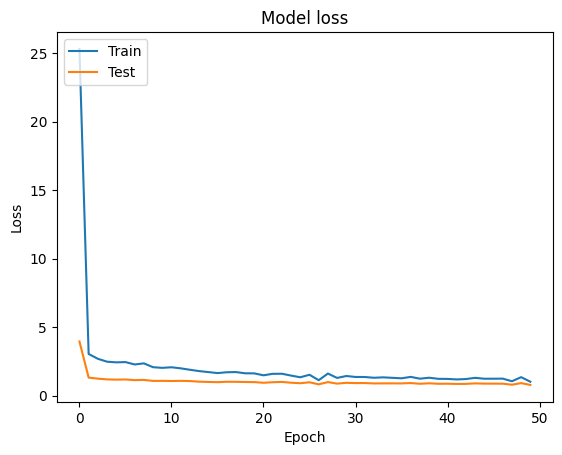

Accuracy: 0.2605042016806723
Precision: 0.15097258334949334
Recall: 0.15878716593824507
F1-Score: 0.12412892122440497
Cohen Kappa Score: 0.5684165690554785
-----------------------BiLSTM-----------------------


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 600)           2565600   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              560800    
 nal)                                                            
                                                                 
 dropout_116 (Dropout)       (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [==========================

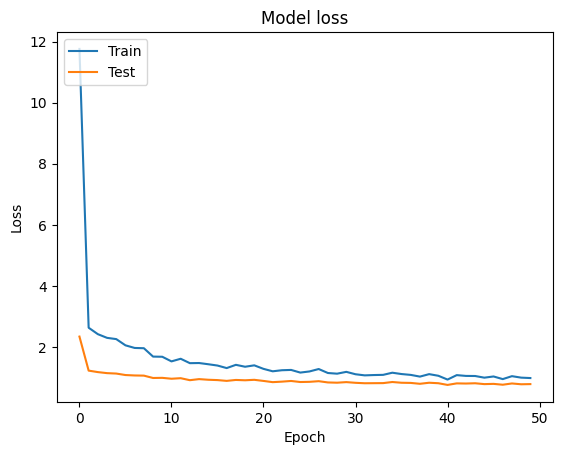

Accuracy: 0.2689075630252101
Precision: 0.22453928505364412
Recall: 0.19297515753630862
F1-Score: 0.16957587188921336
Cohen Kappa Score: 0.6806969459671104
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 768, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 768, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 384, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              

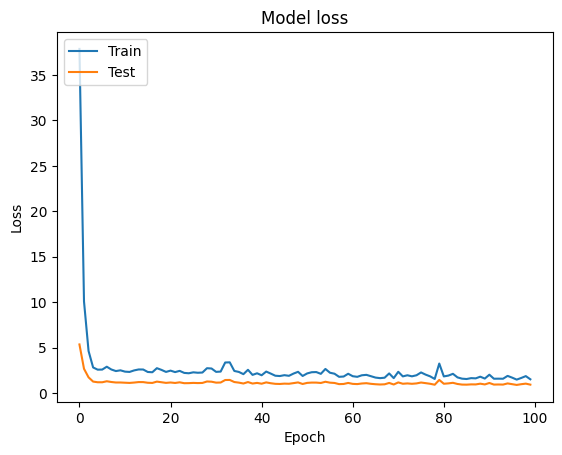

Accuracy: 0.43977591036414565
Precision: 0.17473529078565128
Recall: 0.16557510701395595
F1-Score: 0.1455415923868819
Cohen Kappa Score: 0.5147738411987117

-----------------------Logistic Regression-----------------------
Accuracy: 0.49019607843137253
Precision: 0.16416256157635467
Recall: 0.18257902768694134
F1-Score: 0.1676873739835741
Cohen Kappa Score: 0.5414205067611921


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.5042016806722689
Precision: 0.47533528962191074
Recall: 0.44823671452448427
F1-Score: 0.41053185376714796
Cohen Kappa Score: 0.7649778850020105


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.49859943977591037
Precision: 0.19642245918904686
Recall: 0.273566601264443
F1-Score: 0.22304761904761902
Cohen Kappa Score: 0.6529062870699881


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.4733893557422969
Precision: 0.2670202752159274
Recall: 0.24751875728854147
F1-Score: 0.

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:08<00:00,  2.71it/s]


-----------------------LSTM-----------------------


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_11 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_154 (Dropout)       (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 7s 17ms/step - loss: 23.2945 - mae: 3.7772
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 2.9609 -

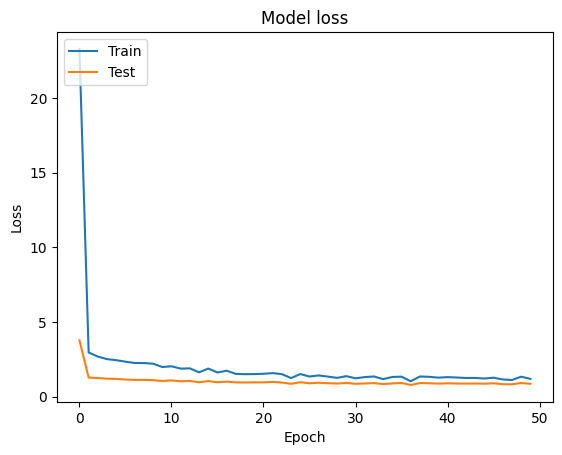

Accuracy: 0.20168067226890757
Precision: 0.08790342456892034
Recall: 0.14135429204508151
F1-Score: 0.09390389771917877
Cohen Kappa Score: 0.49518901464496556
-----------------------BiLSTM-----------------------


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 1, 600)           2565600   
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              560800    
 nal)                                                            
                                                                 
 dropout_155 (Dropout)       (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [==========================

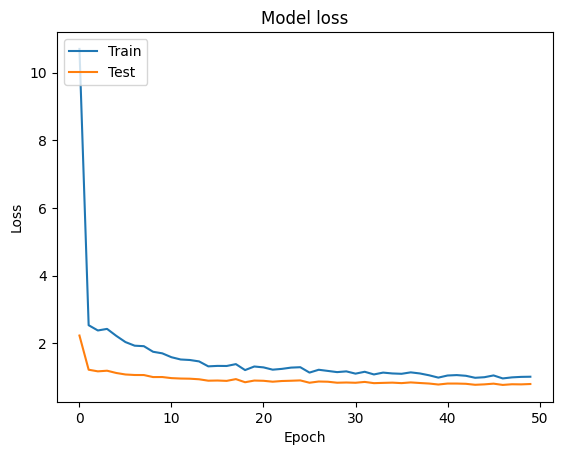

Accuracy: 0.4117647058823529
Precision: 0.28239923347624885
Recall: 0.31348207311386006
F1-Score: 0.28700109086918735
Cohen Kappa Score: 0.7744665332341683
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 768, 1)]          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 768, 64)           256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 384, 64)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              

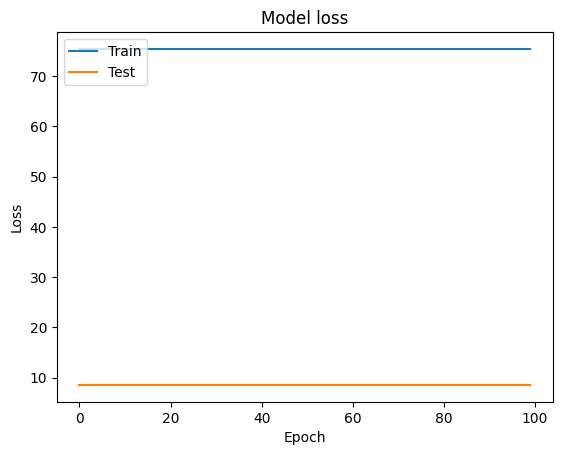

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.5042016806722689
Precision: 0.16548380058906947
Recall: 0.1796563491629281
F1-Score: 0.16482259570494864
Cohen Kappa Score: 0.5465058889209533


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.49019607843137253
Precision: 0.45692560078034933
Recall: 0.3842178772842388
F1-Score: 0.4039725175187132
Cohen Kappa Score: 0.7618862026430302


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.4789915966386555
Precision: 0.19305403842446828
Recall: 0.2642307692307692
F1-Score: 0.21636576330668747
Cohen Kappa Score: 0.5868249800205503


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.4565826330532213
Precision: 0.30956477118383685
Recall: 0.26765828590127794
F1-Score: 0.27906506773425
Cohen Kappa Score: 0.6987619320810973


-----------------------S

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:10<00:00,  2.25it/s]


-----------------------LSTM-----------------------


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_15 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_193 (Dropout)       (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 6s 17ms/step - loss: 22.1375 - mae: 3.6226
Epoch 2/50
12/12 [==============================] - 0s 19ms/step - loss: 3.0238 -

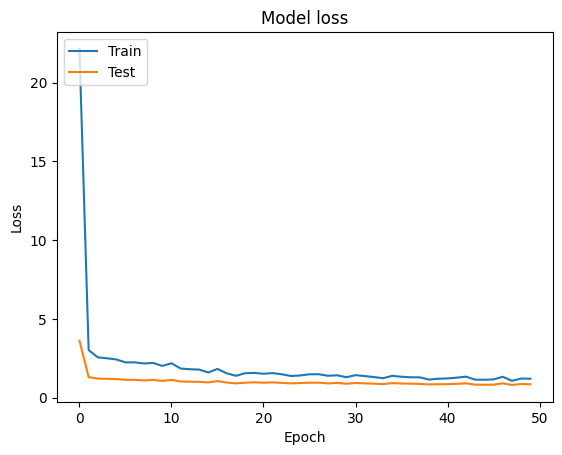

Accuracy: 0.44537815126050423
Precision: 0.24614490772385506
Recall: 0.2686027859049955
F1-Score: 0.2470423140031937
Cohen Kappa Score: 0.7787713761588371
-----------------------BiLSTM-----------------------


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 1, 600)           2565600   
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 200)              560800    
 nal)                                                            
                                                                 
 dropout_194 (Dropout)       (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [==========================

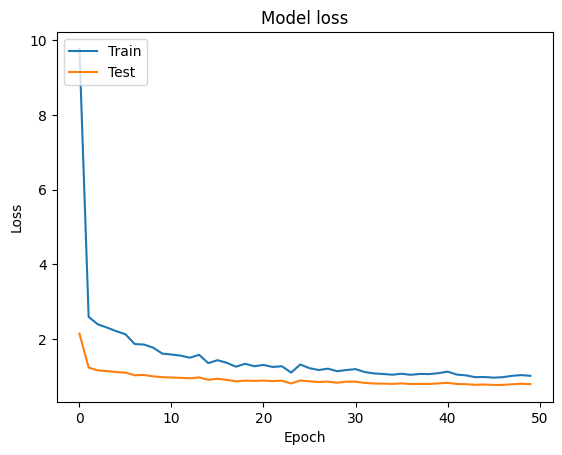

Accuracy: 0.3641456582633053
Precision: 0.29052936976698907
Recall: 0.32725193801834085
F1-Score: 0.2746861125176797
Cohen Kappa Score: 0.7311203542197773
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 768, 1)]          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 768, 64)           256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 384, 64)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0

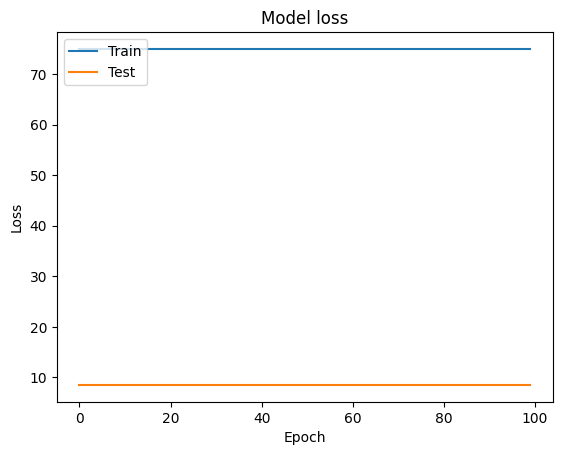

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.46218487394957986
Precision: 0.17088190301456135
Recall: 0.18141201872491963
F1-Score: 0.1674680840270652
Cohen Kappa Score: 0.7007207729598888


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.5070028011204482
Precision: 0.44588822242873105
Recall: 0.430315351515224
F1-Score: 0.42451541049746133
Cohen Kappa Score: 0.806901917199222


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.4677871148459384
Precision: 0.1552760504993405
Recall: 0.2639960557130531
F1-Score: 0.19493375252638673
Cohen Kappa Score: 0.6287777456840047


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.4565826330532213
Precision: 0.33266452991453
Recall: 0.28705594099955806
F1-Score: 0.29375129750784307
Cohen Kappa Score: 0.7424708168614111


-----------------------Sup

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:08<00:00,  2.70it/s]


-----------------------LSTM-----------------------
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_19 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_232 (Dropout)       (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 18ms/step - loss: 22.1886 - mae: 3.6417
Epoch 2/50
12/12 [============

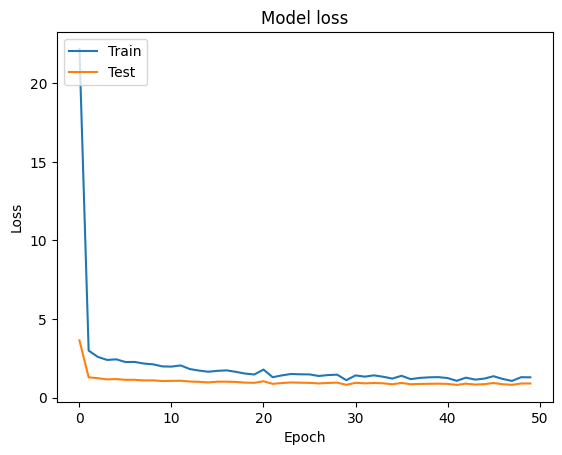

Accuracy: 0.45224719101123595
Precision: 0.28455682658841874
Recall: 0.2831534089296507
F1-Score: 0.2719637128276284
Cohen Kappa Score: 0.7597290327418771
-----------------------BiLSTM-----------------------


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 1, 600)           2565600   
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 200)              560800    
 nal)                                                            
                                                                 
 dropout_233 (Dropout)       (None, 200)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

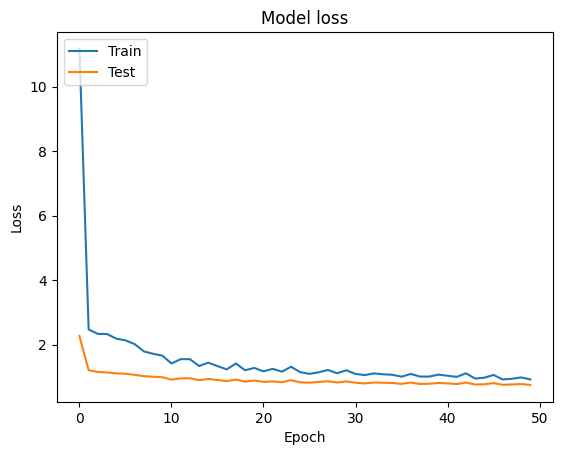

Accuracy: 0.4410112359550562
Precision: 0.34142883079157593
Recall: 0.333767359010508
F1-Score: 0.32279785987089443
Cohen Kappa Score: 0.7148197596795727
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 768, 1)]          0         
                                                                 
 conv1d_6 (Conv1D)           (None, 768, 64)           256       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 384, 64)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)              0 

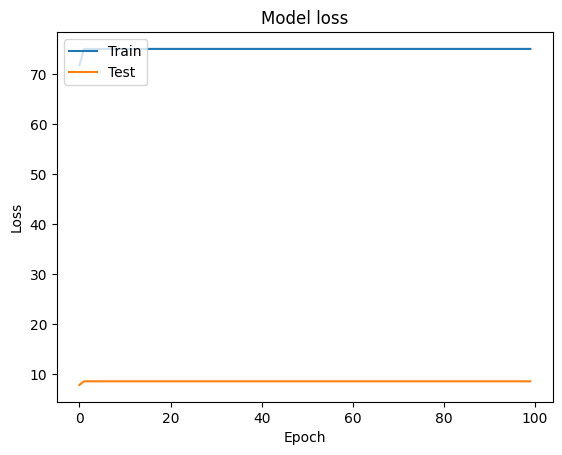

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.4157303370786517
Precision: 0.14445225051025887
Recall: 0.1492790207373031
F1-Score: 0.13033701996167665
Cohen Kappa Score: 0.5027156948433014


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.4943820224719101
Precision: 0.5226498592414501
Recall: 0.40043922882435234
F1-Score: 0.4073087460180222
Cohen Kappa Score: 0.7731969081054447


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.43258426966292135
Precision: 0.18415592783505155
Recall: 0.25800758114190947
F1-Score: 0.2078994859455321
Cohen Kappa Score: 0.5952466598150051


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.449438202247191
Precision: 0.36490603184034925
Recall: 0.28039900367555126
F1-Score: 0.28951480006949354
Cohen Kappa Score: 0.6909502226651796


----------------------

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:10<00:00,  2.25it/s]


-----------------------LSTM-----------------------


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_23 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_271 (Dropout)       (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 7s 19ms/step - loss: 22.9395 - mae: 3.7205
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 2.9375 

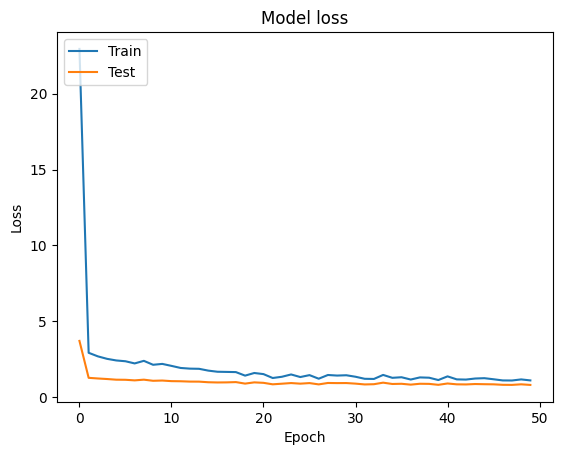

Accuracy: 0.4297752808988764
Precision: 0.2220508309191543
Recall: 0.24237618021559557
F1-Score: 0.22007921689837817
Cohen Kappa Score: 0.7619034657604026
-----------------------BiLSTM-----------------------


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 1, 600)           2565600   
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 200)              560800    
 nal)                                                            
                                                                 
 dropout_272 (Dropout)       (None, 200)               0         
                                                                 
 dense_16 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

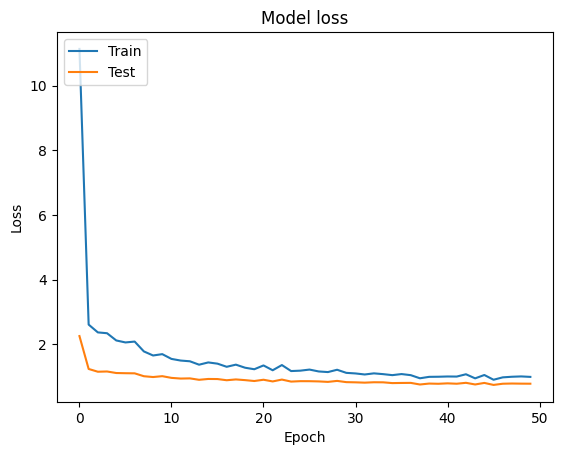

Accuracy: 0.37640449438202245
Precision: 0.21764038557071344
Recall: 0.31973678168420083
F1-Score: 0.2116289592782884
Cohen Kappa Score: 0.6916301516338956
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 768, 1)]          0         
                                                                 
 conv1d_8 (Conv1D)           (None, 768, 64)           256       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 384, 64)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_4 (Glo  (None, 128)              

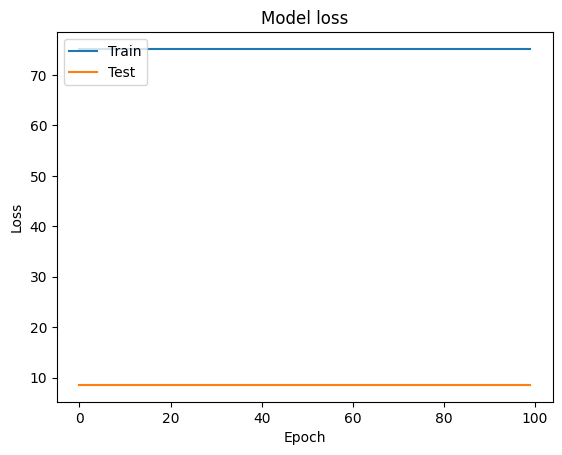

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.44662921348314605
Precision: 0.12254026218085413
Recall: 0.14348497262266738
F1-Score: 0.1274886033506723
Cohen Kappa Score: 0.5748146712534523


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.4606741573033708
Precision: 0.2928673573617394
Recall: 0.3688340031282731
F1-Score: 0.30334661576083155
Cohen Kappa Score: 0.7780768116863394


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.4606741573033708
Precision: 0.17051243632004795
Recall: 0.24036619118586333
F1-Score: 0.19401882384770266
Cohen Kappa Score: 0.6361425011095558


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.43258426966292135
Precision: 0.23893382046878758
Recall: 0.30241961087517605
F1-Score: 0.23990199746832017
Cohen Kappa Score: 0.7279016525767268


-------------------

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:10<00:00,  2.25it/s]


-----------------------LSTM-----------------------
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_27 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_310 (Dropout)       (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 6s 19ms/step - loss: 2.6173 - mae: 1.2089
Epoch 2/50
12/12 [============

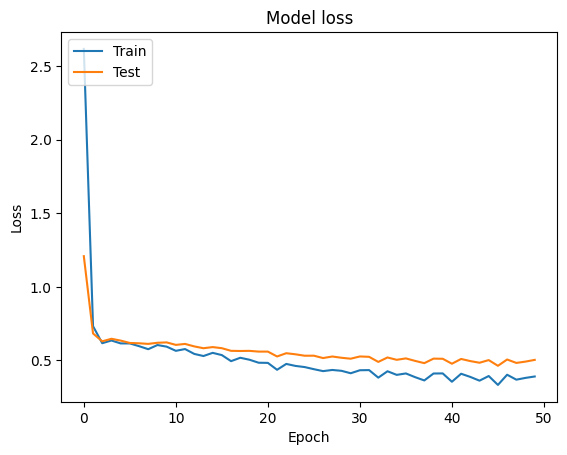

Accuracy: 0.5694444444444444
Precision: 0.31044806495495786
Recall: 0.31702270607064303
F1-Score: 0.28848089654622316
Cohen Kappa Score: 0.5242406542056075
-----------------------BiLSTM-----------------------


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_10 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_311 (Dropout)       (None, 200)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

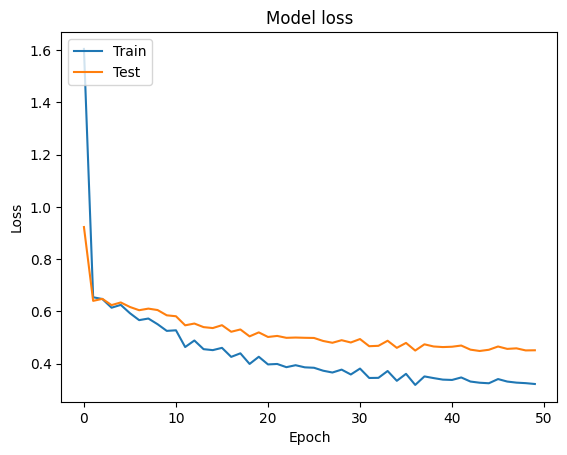

Accuracy: 0.55
Precision: 0.37050277862085984
Recall: 0.2949031875226447
F1-Score: 0.2988489684918257
Cohen Kappa Score: 0.5144430706979881
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 768, 1)]          0         
                                                                 
 conv1d_10 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 384, 64)          0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_5 (Glo  (None, 128)              0         
 balM

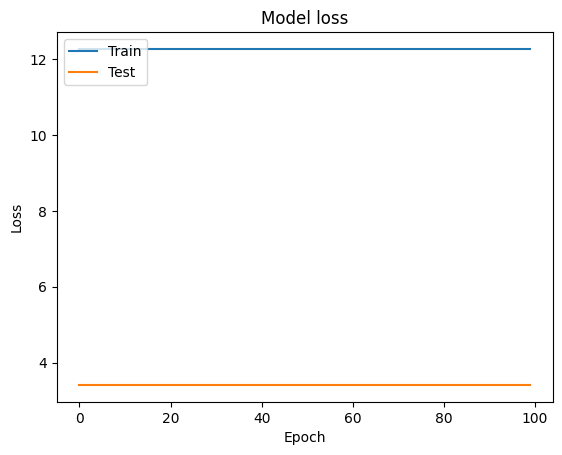

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.6305555555555555
Precision: 0.3527207559465624
Recall: 0.26751040587921476
F1-Score: 0.26233846310918324
Cohen Kappa Score: 0.5334370139968896


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.6833333333333333
Precision: 0.43222209888876556
Recall: 0.3685798078870716
F1-Score: 0.383606841712029
Cohen Kappa Score: 0.6815671384190543


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.65
Precision: 0.3829144620811287
Recall: 0.36554848041355353
F1-Score: 0.3649978833642648
Cohen Kappa Score: 0.6663687033336839


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.65
Precision: 0.4644832812351994
Recall: 0.3619238965774001
F1-Score: 0.38756852715575024
Cohen Kappa Score: 0.6502993322588073


-----------------------Support Vector Classifier------

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:10<00:00,  2.25it/s]


-----------------------LSTM-----------------------
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_31 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_349 (Dropout)       (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 16ms/step - loss: 2.7493 - mae: 1.2531
Epoch 2/50
12/12 [============

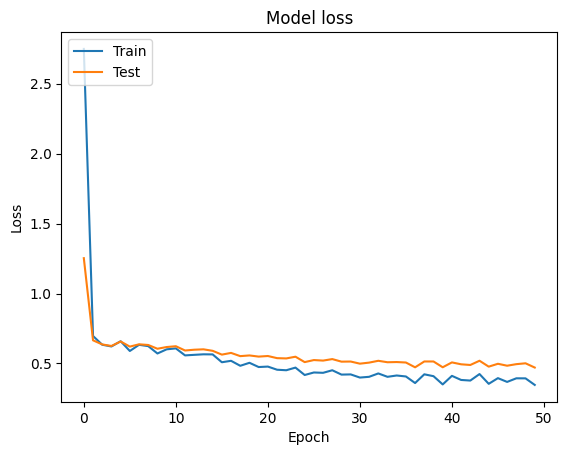

Accuracy: 0.6333333333333333
Precision: 0.37819313542071137
Recall: 0.3555840620816735
F1-Score: 0.359256444983773
Cohen Kappa Score: 0.6149732620320856
-----------------------BiLSTM-----------------------


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_12 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_350 (Dropout)       (None, 200)               0         
                                                                 
 dense_22 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

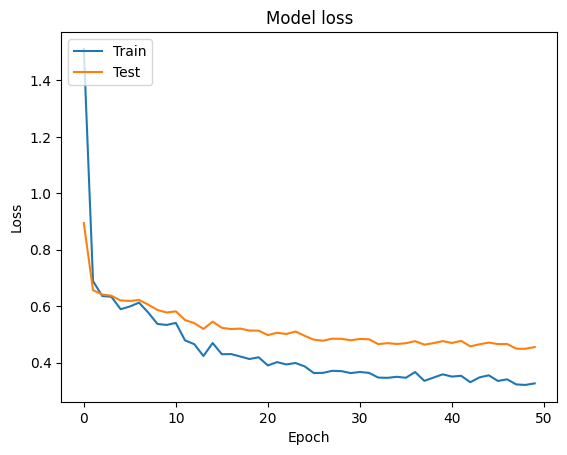

Accuracy: 0.6527777777777778
Precision: 0.3990023877277336
Recall: 0.36390814643239483
F1-Score: 0.37699825743181187
Cohen Kappa Score: 0.6105973582778531
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 768, 1)]          0         
                                                                 
 conv1d_12 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 384, 64)          0         
 1D)                                                             
                                                                 
 conv1d_13 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_6 (Glo  (None, 128)              0

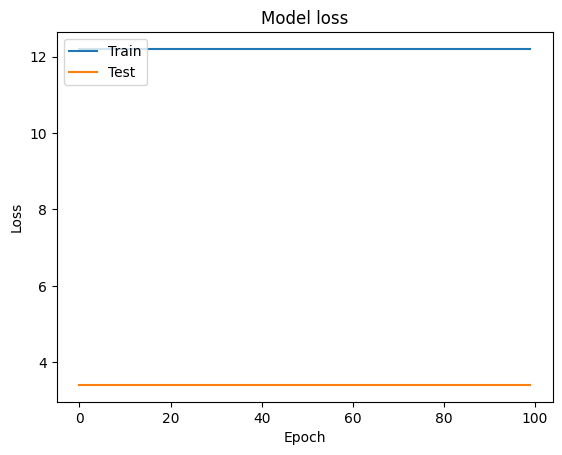

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.6361111111111111
Precision: 0.3969674556213018
Recall: 0.3001875711546126
F1-Score: 0.31823702427648637
Cohen Kappa Score: 0.5555036457377405


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.6638888888888889
Precision: 0.4377749799053146
Recall: 0.370486541166462
F1-Score: 0.3915973723955652
Cohen Kappa Score: 0.5925873532324233


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.6222222222222222
Precision: 0.3530454751795776
Recall: 0.38273094307452266
F1-Score: 0.3607676879555342
Cohen Kappa Score: 0.5801235438955205


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.5944444444444444
Precision: 0.4704761904761905
Recall: 0.3065926033160507
F1-Score: 0.3280529855170158
Cohen Kappa Score: 0.5227474772681193


-----------------------Suppor

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:10<00:00,  2.25it/s]


-----------------------LSTM-----------------------


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_35 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_388 (Dropout)       (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 18ms/step - loss: 2.5872 - mae: 1.2152
Epoch 2/50
12/12 [==============================] - 0s 17ms/step - loss: 0.7483 -

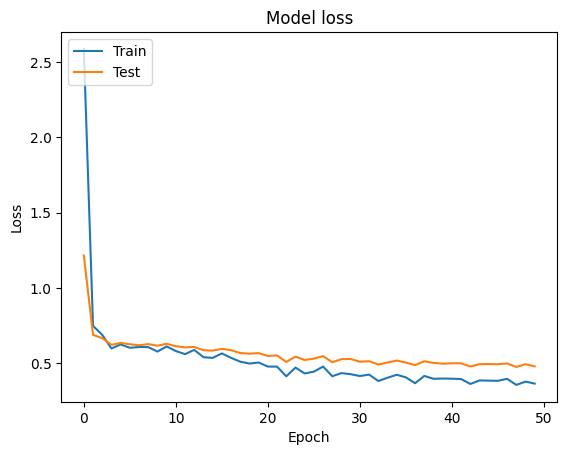

Accuracy: 0.5888888888888889
Precision: 0.3518570318570318
Recall: 0.30570856685657444
F1-Score: 0.30788096672828724
Cohen Kappa Score: 0.5758468335787923
-----------------------BiLSTM-----------------------


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_14 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_389 (Dropout)       (None, 200)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

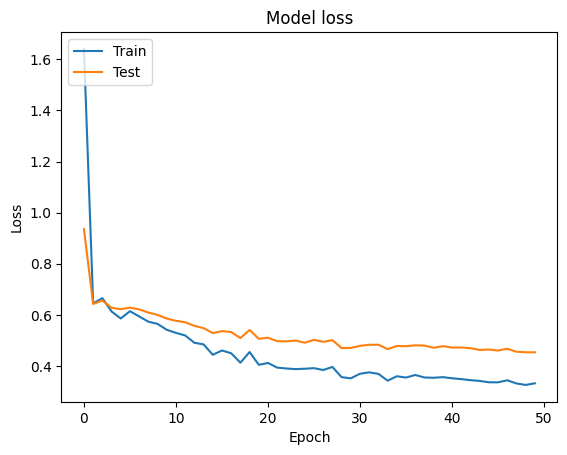

Accuracy: 0.6277777777777778
Precision: 0.3595105704480705
Recall: 0.30610803736989695
F1-Score: 0.315114749022795
Cohen Kappa Score: 0.6017822333611808
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 768, 1)]          0         
                                                                 
 conv1d_14 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 384, 64)          0         
 1D)                                                             
                                                                 
 conv1d_15 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_7 (Glo  (None, 128)              0  

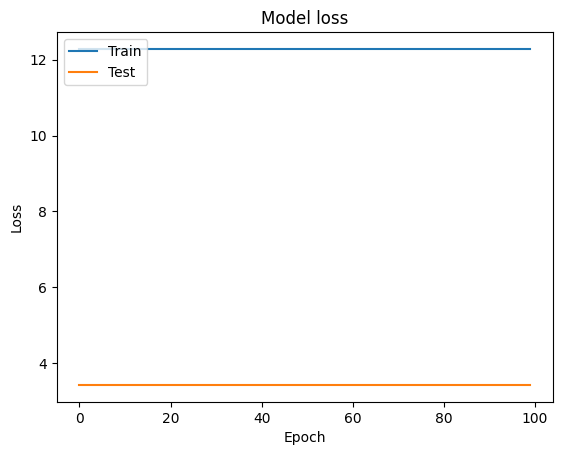

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.6611111111111111
Precision: 0.42577859377124977
Recall: 0.3386040658336673
F1-Score: 0.35946854115078414
Cohen Kappa Score: 0.5966451117229017


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.6694444444444444
Precision: 0.414400871459695
Recall: 0.3608497272633895
F1-Score: 0.37519452225334576
Cohen Kappa Score: 0.638642841818126


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.6666666666666666
Precision: 0.3330821635814217
Recall: 0.3402727095801099
F1-Score: 0.3349099209983031
Cohen Kappa Score: 0.6343265205614381


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.6
Precision: 0.33016618497109823
Recall: 0.28673825471738185
F1-Score: 0.296653663995829
Cohen Kappa Score: 0.5507487520798668


-----------------------Support Vector Class

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:10<00:00,  2.25it/s]


-----------------------LSTM-----------------------


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_39 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_427 (Dropout)       (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 20ms/step - loss: 2.6323 - mae: 1.2087
Epoch 2/50
12/12 [==============================] - 0s 22ms/step - loss: 0.7335 -

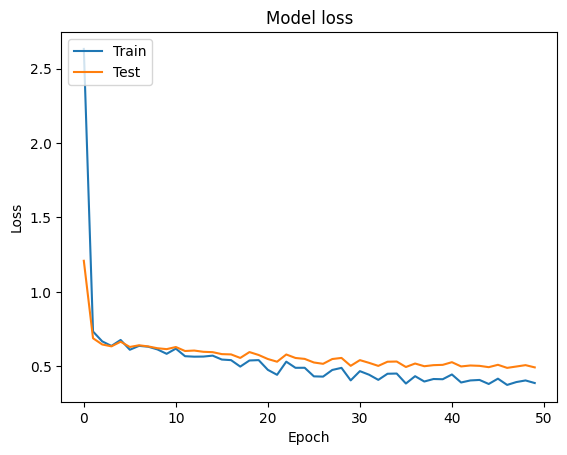

Accuracy: 0.6888888888888889
Precision: 0.4790658872244549
Recall: 0.4832874460653381
F1-Score: 0.4783122954207156
Cohen Kappa Score: 0.6882060551287845
-----------------------BiLSTM-----------------------


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_16 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_17 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_428 (Dropout)       (None, 200)               0         
                                                                 
 dense_28 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

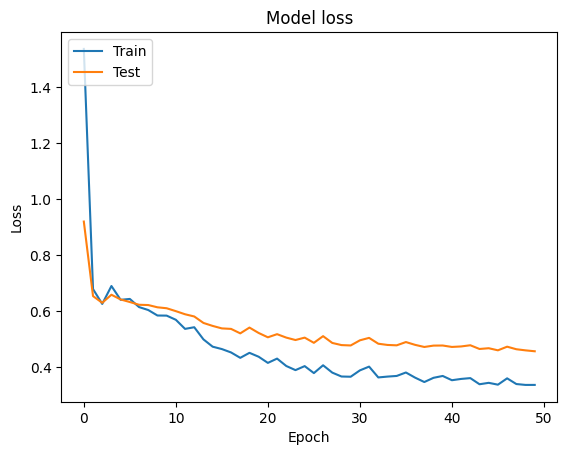

Accuracy: 0.6583333333333333
Precision: 0.4860829076757357
Recall: 0.38146702280665706
F1-Score: 0.40315848512915514
Cohen Kappa Score: 0.6040920716112532
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 768, 1)]          0         
                                                                 
 conv1d_16 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 384, 64)          0         
 1D)                                                             
                                                                 
 conv1d_17 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_8 (Glo  (None, 128)              0

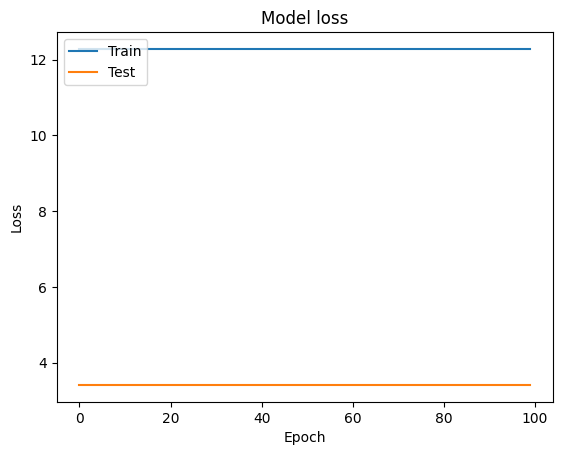

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.6805555555555556
Precision: 0.6282092447655361
Recall: 0.37425655777001576
F1-Score: 0.40264107520942644
Cohen Kappa Score: 0.5871254162042174


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.7166666666666667
Precision: 0.43488743645606387
Recall: 0.4341236901582084
F1-Score: 0.4335387482365089
Cohen Kappa Score: 0.6876549330689141


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.6722222222222223
Precision: 0.3866324185063482
Recall: 0.4501335524964043
F1-Score: 0.40690631162700397
Cohen Kappa Score: 0.6803170409511228


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.5944444444444444
Precision: 0.3195971320300205
Recall: 0.29898865374517725
F1-Score: 0.3052704873061585
Cohen Kappa Score: 0.5945578231292518


-----------------------Su

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:08<00:00,  2.68it/s]


-----------------------LSTM-----------------------


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_43 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_466 (Dropout)       (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 20ms/step - loss: 2.6220 - mae: 1.1996
Epoch 2/50
12/12 [==============================] - 0s 24ms/step - loss: 0.7005 -

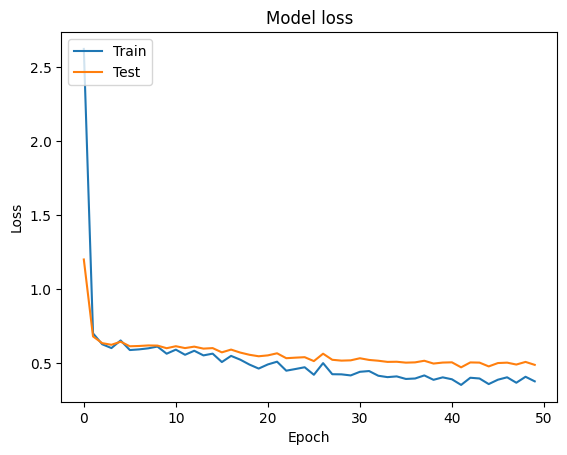

Accuracy: 0.5722222222222222
Precision: 0.3485188815377495
Recall: 0.284253231482833
F1-Score: 0.2840595206272833
Cohen Kappa Score: 0.5119617224880383
-----------------------BiLSTM-----------------------


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_18 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_19 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_467 (Dropout)       (None, 200)               0         
                                                                 
 dense_31 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

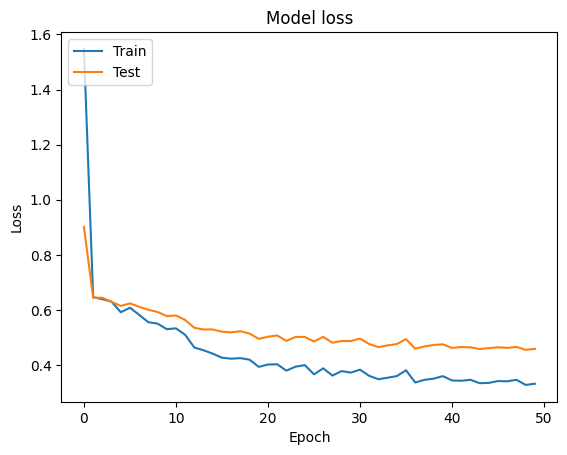

Accuracy: 0.6166666666666667
Precision: 0.3586084054834055
Recall: 0.30865226487617375
F1-Score: 0.31645347294625875
Cohen Kappa Score: 0.5749704840613932
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_18 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 384, 64)          0         
 1D)                                                             
                                                                 
 conv1d_19 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_9 (Glo  (None, 128)              0

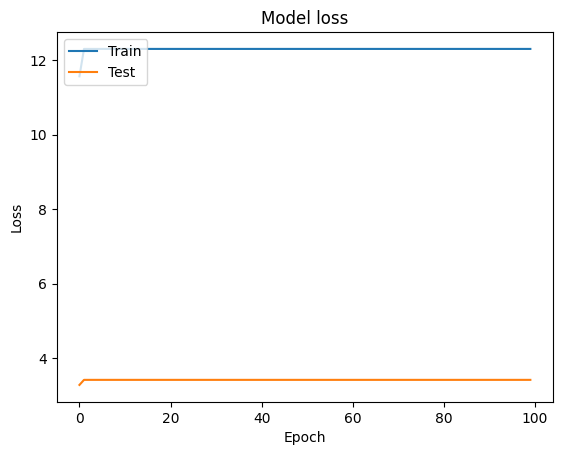

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.6472222222222223
Precision: 0.3376502148591501
Recall: 0.28517977910767284
F1-Score: 0.2885636639044819
Cohen Kappa Score: 0.6014908256880733


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.6555555555555556
Precision: 0.4406779661016949
Recall: 0.37593927893738144
F1-Score: 0.39691630853028625
Cohen Kappa Score: 0.62982689747004


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.6444444444444445
Precision: 0.3034310262074476
Recall: 0.3378789795488088
F1-Score: 0.316255436723273
Cohen Kappa Score: 0.6186649171723799


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.6166666666666667
Precision: 0.4618497300180178
Recall: 0.3724157057363888
F1-Score: 0.39989950191847295
Cohen Kappa Score: 0.5760897490793868


-----------------------Suppor

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 22/22 [00:10<00:00,  2.15it/s]


-----------------------LSTM-----------------------
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_47 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_505 (Dropout)       (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 5s 19ms/step - loss: 1.2866 - mae: 0.9110
Epoch 2/50
11/11 [============

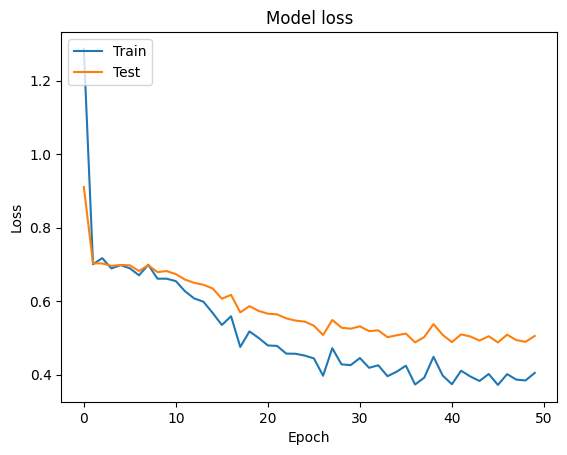

Accuracy: 0.6358381502890174
Precision: 0.49027092717526444
Recall: 0.45950691196495175
F1-Score: 0.4606937541816961
Cohen Kappa Score: 0.590464195207818
-----------------------BiLSTM-----------------------


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_20 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_21 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_506 (Dropout)       (None, 200)               0         
                                                                 
 dense_34 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [=========================

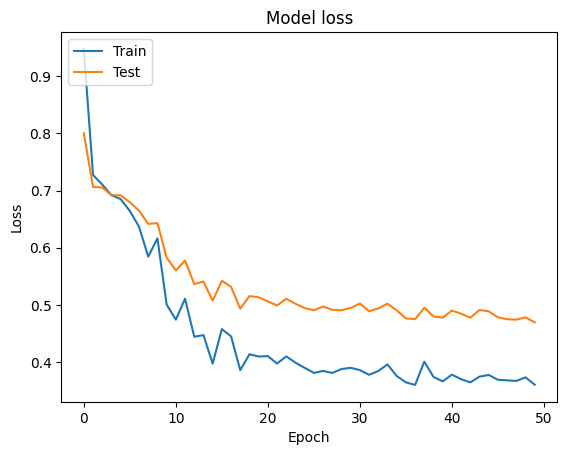

Accuracy: 0.5722543352601156
Precision: 0.4661355090774917
Recall: 0.40738781007637204
F1-Score: 0.39430097716544543
Cohen Kappa Score: 0.5365239294710327
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_20 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_10 (Gl  (None, 128)              0

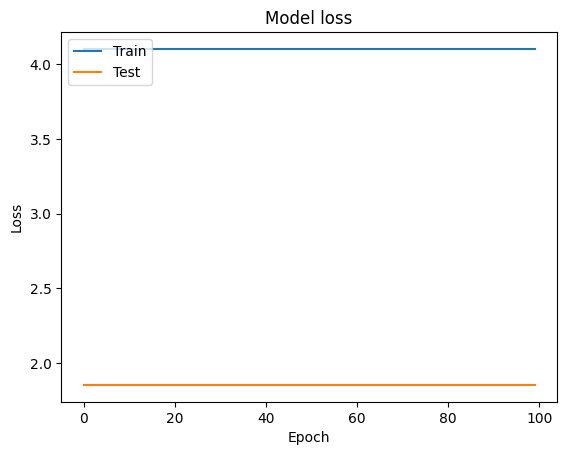

Accuracy: 0.017341040462427744
Precision: 0.004335260115606936
Recall: 0.25
F1-Score: 0.008522727272727272
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.5953757225433526
Precision: 0.46791824518949987
Recall: 0.43452319282458113
F1-Score: 0.42986480715205666
Cohen Kappa Score: 0.5838933770992798


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.4393063583815029
Precision: 0.4836932999231185
Recall: 0.4257022970812859
F1-Score: 0.37575789180920594
Cohen Kappa Score: 0.2699883441285392


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.49710982658959535
Precision: 0.43613108310877813
Recall: 0.43504812720778324
F1-Score: 0.40992251670970326
Cohen Kappa Score: 0.5386087665903172


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.5549132947976878
Precision: 0.4294473196559982
Recall: 0.4018941300100645
F1-Score: 0.4015765341373029
Cohen Kapp

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 22/22 [00:10<00:00,  2.15it/s]


-----------------------LSTM-----------------------


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_51 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_544 (Dropout)       (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 5s 21ms/step - loss: 1.1260 - mae: 0.8543
Epoch 2/50
11/11 [==============================] - 0s 22ms/step - loss: 0.7218 -

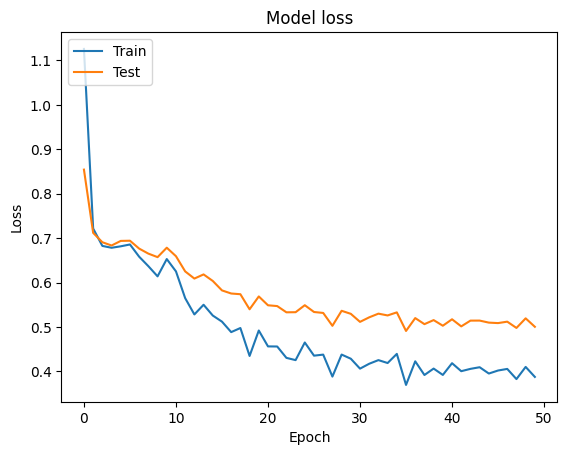

Accuracy: 0.6434782608695652
Precision: 0.49279420142297853
Recall: 0.5000545419627425
F1-Score: 0.4931599832915623
Cohen Kappa Score: 0.6458961030361222
-----------------------BiLSTM-----------------------


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_22 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_23 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_545 (Dropout)       (None, 200)               0         
                                                                 
 dense_37 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [=========================

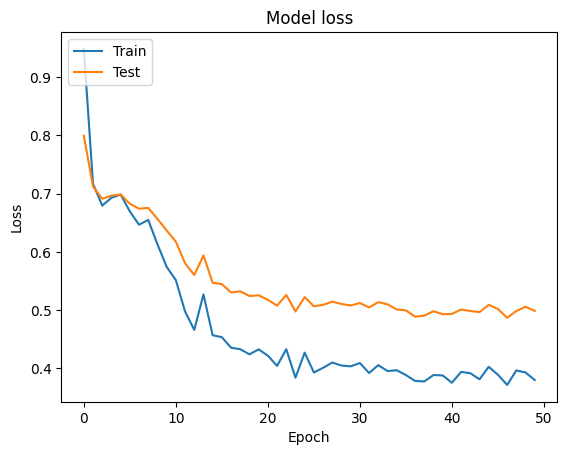

Accuracy: 0.6695652173913044
Precision: 0.5462737769905811
Recall: 0.49546322258498177
F1-Score: 0.4974298452661946
Cohen Kappa Score: 0.6630578793958436
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_22 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_23 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_11 (Gl  (None, 128)              0 

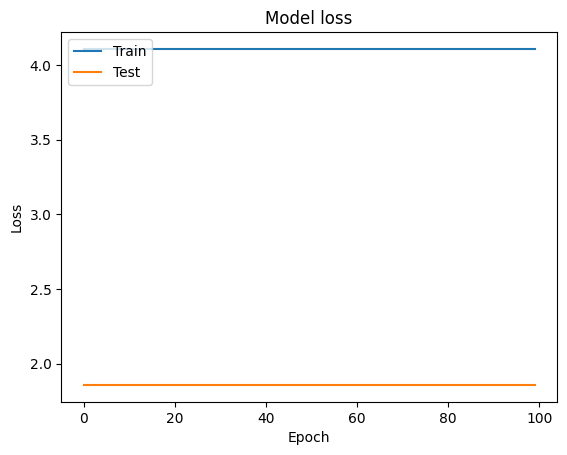

Accuracy: 0.03188405797101449
Precision: 0.007971014492753623
Recall: 0.25
F1-Score: 0.01544943820224719
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.6956521739130435
Precision: 0.7669624545465984
Recall: 0.5711403704802975
F1-Score: 0.564213112145443
Cohen Kappa Score: 0.743524218840748


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.5333333333333333
Precision: 0.4364687301266941
Recall: 0.41232898021893605
F1-Score: 0.410426174594816
Cohen Kappa Score: 0.47942914483219967


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.4463768115942029
Precision: 0.41859064138475904
Recall: 0.33278373518166104
F1-Score: 0.33675408181337035
Cohen Kappa Score: 0.2687246603599118


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.6782608695652174
Precision: 0.6370333454150054
Recall: 0.5533925310333991
F1-Score: 0.5594058999903115
Cohen Kappa Score:

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 22/22 [00:04<00:00,  4.71it/s]


-----------------------LSTM-----------------------


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_55 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_583 (Dropout)       (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 6s 41ms/step - loss: 1.1600 - mae: 0.8704
Epoch 2/50
11/11 [==============================] - 0s 29ms/step - loss: 0.7086 -

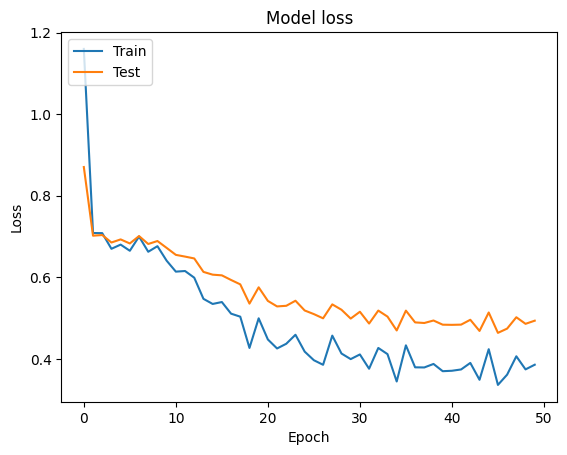

Accuracy: 0.5246376811594203
Precision: 0.28508307196744936
Recall: 0.357580373347161
F1-Score: 0.3036458333333334
Cohen Kappa Score: 0.39815556959518705
-----------------------BiLSTM-----------------------


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_24 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_25 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_584 (Dropout)       (None, 200)               0         
                                                                 
 dense_40 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [=========================

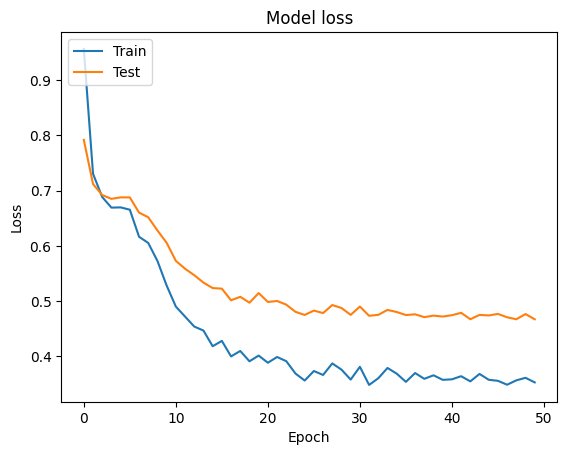

Accuracy: 0.3507246376811594
Precision: 0.2898053059477963
Recall: 0.3045706939763201
F1-Score: 0.2413128875856213
Cohen Kappa Score: 0.33689433220096554
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_24 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_25 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_12 (Gl  (None, 128)              0 

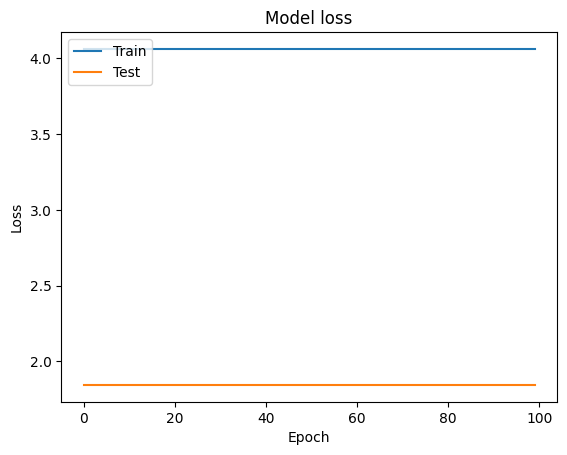

Accuracy: 0.02608695652173913
Precision: 0.006521739130434782
Recall: 0.25
F1-Score: 0.01271186440677966
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.5623188405797102
Precision: 0.4289225400446605
Recall: 0.45935960591133007
F1-Score: 0.4180652621241886
Cohen Kappa Score: 0.5787639302046796


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.4463768115942029
Precision: 0.42325254654021777
Recall: 0.3103340247169648
F1-Score: 0.2749099937022894
Cohen Kappa Score: 0.23216024481847275


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.4985507246376812
Precision: 0.3777308777684326
Recall: 0.39183087027914615
F1-Score: 0.3662967986977753
Cohen Kappa Score: 0.4039809218795737


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.5333333333333333
Precision: 0.408818577936225
Recall: 0.42566545674531153
F1-Score: 0.40911123081862383
Cohen Kappa Sco

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 22/22 [00:10<00:00,  2.15it/s]


-----------------------LSTM-----------------------


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_59 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_622 (Dropout)       (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 7s 34ms/step - loss: 1.1975 - mae: 0.8732
Epoch 2/50
11/11 [==============================] - 0s 31ms/step - loss: 0.7442 -

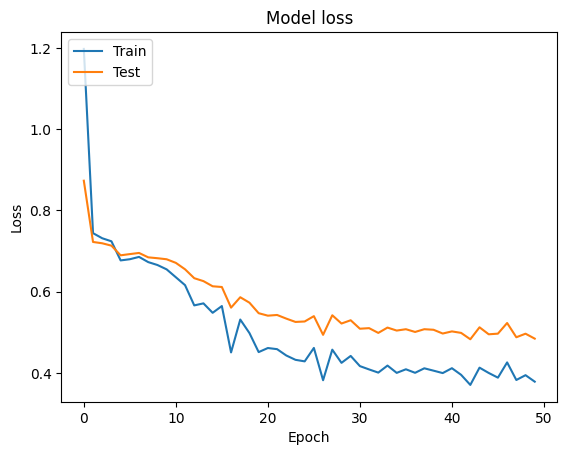

Accuracy: 0.39710144927536234
Precision: 0.34437489244536224
Recall: 0.32754002648368846
F1-Score: 0.2968580721180383
Cohen Kappa Score: 0.3788180824384283
-----------------------BiLSTM-----------------------


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_26 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_27 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_623 (Dropout)       (None, 200)               0         
                                                                 
 dense_43 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [=========================

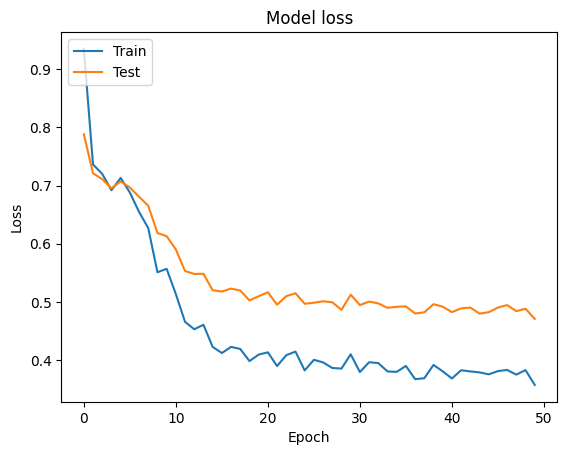

Accuracy: 0.37971014492753624
Precision: 0.3362369337979094
Recall: 0.3187973997833153
F1-Score: 0.2856657681780714
Cohen Kappa Score: 0.3548625207602879
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_26 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_27 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_13 (Gl  (None, 128)              0 

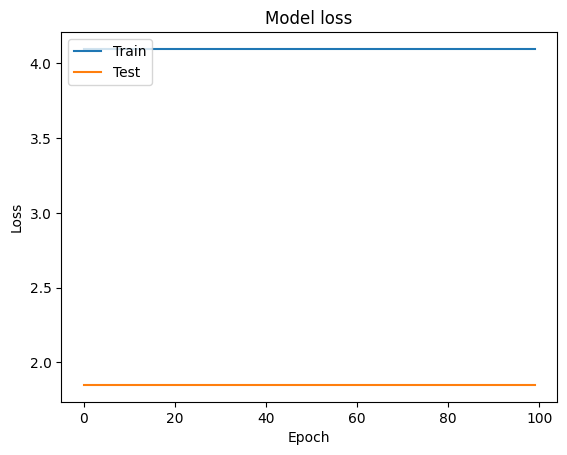

Accuracy: 0.02318840579710145
Precision: 0.005797101449275362
Recall: 0.25
F1-Score: 0.0113314447592068
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.5797101449275363
Precision: 0.6872122122122122
Recall: 0.5100480016853256
F1-Score: 0.4892549742901855
Cohen Kappa Score: 0.6262708182476466


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.45507246376811594
Precision: 0.36175087959253643
Recall: 0.3101751534850126
F1-Score: 0.3008381978745697
Cohen Kappa Score: 0.28430431802604517


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.37681159420289856
Precision: 0.2666510611735331
Recall: 0.2995365354520284
F1-Score: 0.25758985669254864
Cohen Kappa Score: 0.2459548753282692


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.553623188405797
Precision: 0.5450571143086338
Recall: 0.4683361923678825
F1-Score: 0.46975064279443113
Cohen Kappa Scor

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 22/22 [00:04<00:00,  4.73it/s]


-----------------------LSTM-----------------------


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_63 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_661 (Dropout)       (None, 128)               0         
                                                                 
 dense_45 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 6s 32ms/step - loss: 1.1016 - mae: 0.8394
Epoch 2/50
11/11 [==============================] - 0s 33ms/step - loss: 0.6893 -

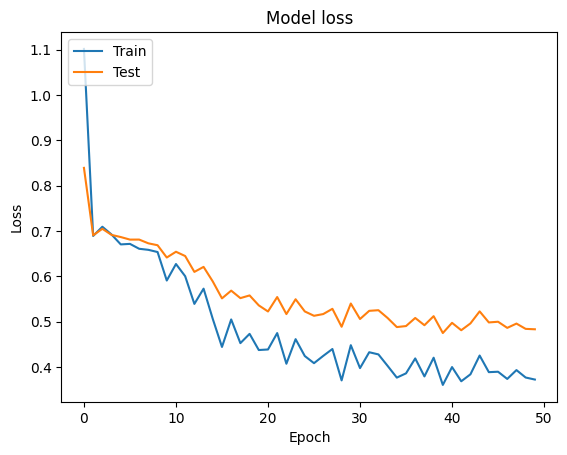

Accuracy: 0.42318840579710143
Precision: 0.3834220011723833
Recall: 0.3430242486338798
F1-Score: 0.306063626445949
Cohen Kappa Score: 0.4468452895419188
-----------------------BiLSTM-----------------------


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_28 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_29 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_662 (Dropout)       (None, 200)               0         
                                                                 
 dense_46 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
22/22 [=========================

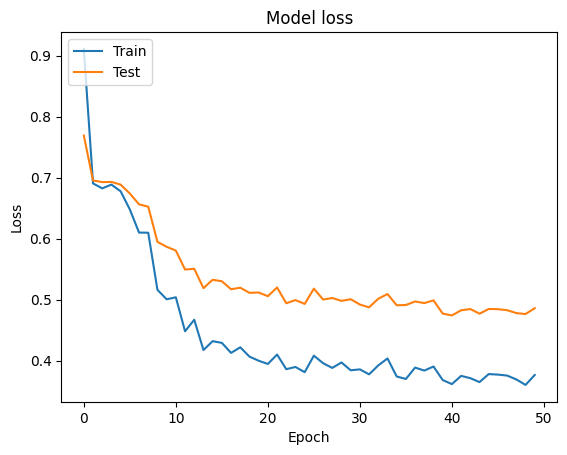

Accuracy: 0.4782608695652174
Precision: 0.4077651515151515
Recall: 0.3830686475409836
F1-Score: 0.35748830077781857
Cohen Kappa Score: 0.5141111700473726
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_28 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_29 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_14 (Gl  (None, 128)              0 

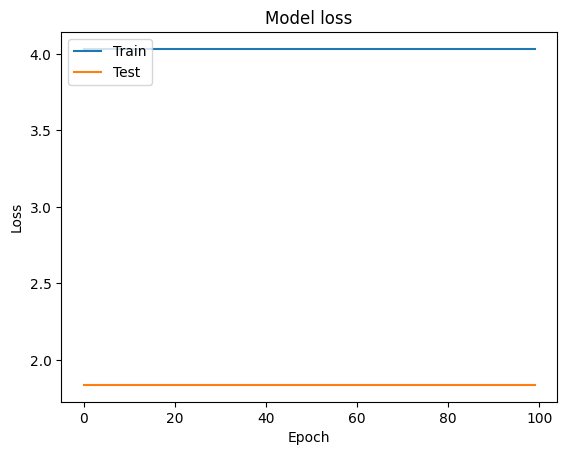

Accuracy: 0.014492753623188406
Precision: 0.0036231884057971015
Recall: 0.25
F1-Score: 0.007142857142857143
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.6115942028985507
Precision: 0.45311298432416447
Recall: 0.47844091530054644
F1-Score: 0.44495771717993937
Cohen Kappa Score: 0.6589685392886135


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.463768115942029
Precision: 0.3980095063720622
Recall: 0.34174351092896177
F1-Score: 0.33595098918545546
Cohen Kappa Score: 0.37341288429772446


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.32463768115942027
Precision: 0.2623502466525722
Recall: 0.2461577868852459
F1-Score: 0.24765884445950523
Cohen Kappa Score: -0.02321235706571123


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.6057971014492753
Precision: 0.5412099898063201
Recall: 0.5156335382513662
F1-Score: 0.5204043292598279
Cohen Ka

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:05<00:00,  4.06it/s]


-----------------------LSTM-----------------------


Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_67 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_700 (Dropout)       (None, 128)               0         
                                                                 
 dense_48 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 25ms/step - loss: 1.1801 - mae: 0.8909
Epoch 2/50
12/12 [==============================] - 0s 24ms/step - loss: 0.9338 -

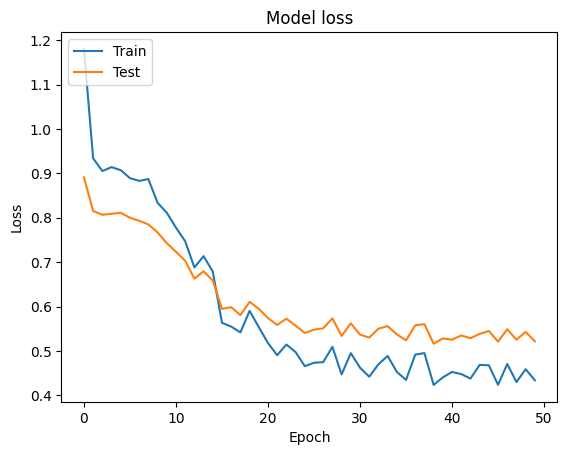

Accuracy: 0.5847457627118644
Precision: 0.444036850921273
Recall: 0.4298844537815126
F1-Score: 0.3741724337191097
Cohen Kappa Score: 0.5468896663537844
-----------------------BiLSTM-----------------------


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_30 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_31 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_701 (Dropout)       (None, 200)               0         
                                                                 
 dense_49 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

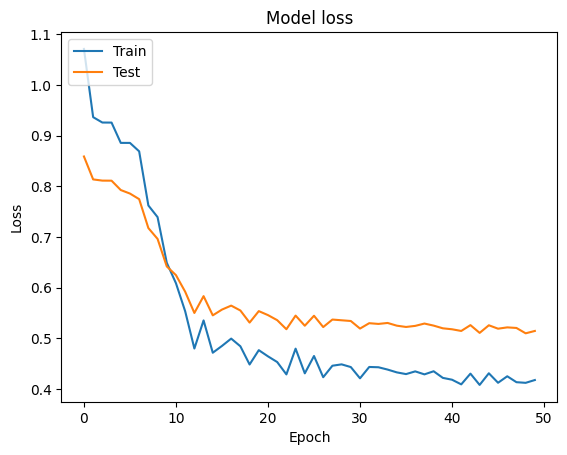

Accuracy: 0.22598870056497175
Precision: 0.19933591118386254
Recall: 0.3270253413865546
F1-Score: 0.19029862544519993
Cohen Kappa Score: 0.3884001441502555
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_30 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_31 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_15 (Gl  (None, 128)              

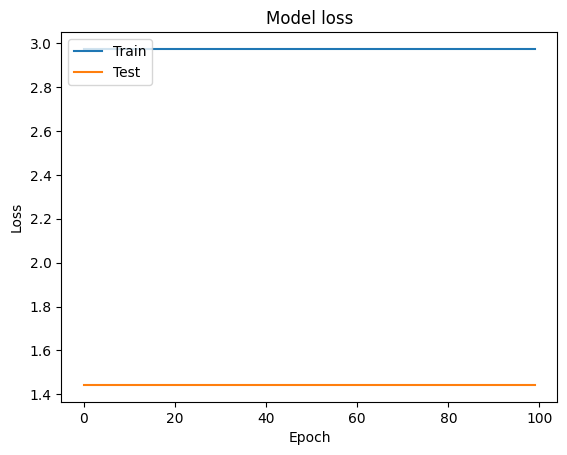

Accuracy: 0.18361581920903955
Precision: 0.04590395480225989
Recall: 0.25
F1-Score: 0.07756563245823389
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.6101694915254238
Precision: 0.5893576591741648
Recall: 0.585359516402715
F1-Score: 0.5753772958710206
Cohen Kappa Score: 0.6893932855786657


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.4887005649717514
Precision: 0.4556582530372853
Recall: 0.4360346301982331
F1-Score: 0.42331624934827816
Cohen Kappa Score: 0.5831270004227309


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.3700564971751412
Precision: 0.478441127694859
Recall: 0.27878891941391937
F1-Score: 0.2014585036615395
Cohen Kappa Score: 0.10472765546881868


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.5649717514124294
Precision: 0.5333209979233631
Recall: 0.5478290474843783
F1-Score: 0.5347166999772249
Cohen Kappa Score: 0

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:05<00:00,  4.50it/s]


-----------------------LSTM-----------------------


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_70 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_71 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_739 (Dropout)       (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 6s 22ms/step - loss: 1.1157 - mae: 0.8608
Epoch 2/50
12/12 [==============================] - 0s 27ms/step - loss: 0.9239 -

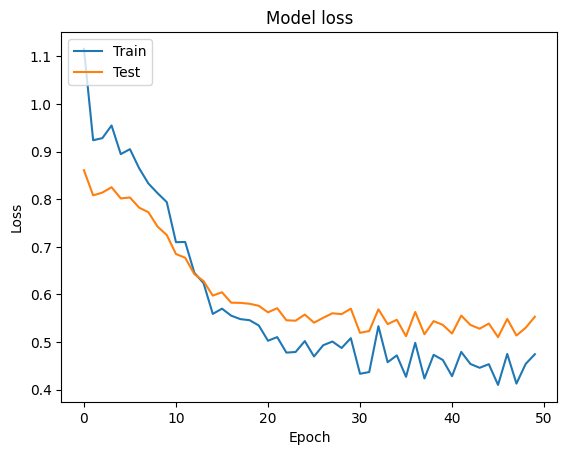

Accuracy: 0.5480225988700564
Precision: 0.5234094119157678
Recall: 0.3985418441827757
F1-Score: 0.3320328323206481
Cohen Kappa Score: 0.5063183060109289
-----------------------BiLSTM-----------------------


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_32 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_33 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_740 (Dropout)       (None, 200)               0         
                                                                 
 dense_52 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

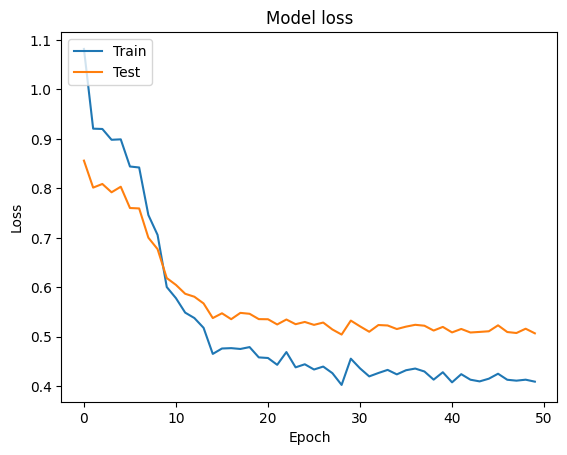

Accuracy: 0.4887005649717514
Precision: 0.6275588019272061
Recall: 0.4230904872437847
F1-Score: 0.40065226776817076
Cohen Kappa Score: 0.5669834612913045
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_32 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_33 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_16 (Gl  (None, 128)              0 

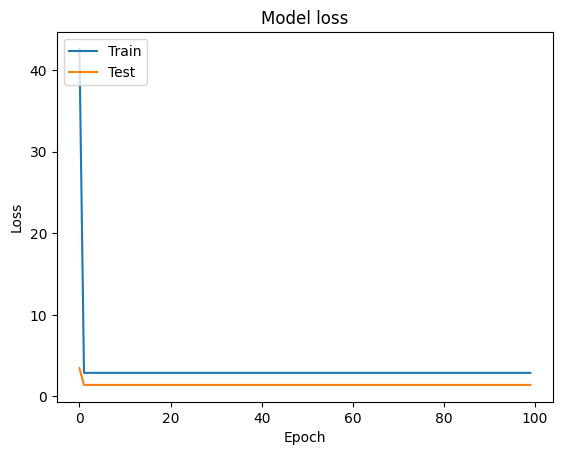

Accuracy: 0.16101694915254236
Precision: 0.04025423728813559
Recall: 0.25
F1-Score: 0.06934306569343066
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.5649717514124294
Precision: 0.575933908045977
Recall: 0.5232728684423951
F1-Score: 0.5229282749649656
Cohen Kappa Score: 0.6649774087190133


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.5
Precision: 0.5114235967962331
Recall: 0.507770860540463
F1-Score: 0.4802175565867155
Cohen Kappa Score: 0.627892782666192


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.3220338983050847
Precision: 0.32372358823971725
Recall: 0.37333269936331037
F1-Score: 0.2642679927993936
Cohen Kappa Score: 0.4611055798450284


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.5254237288135594
Precision: 0.5052887364208118
Recall: 0.49653218847712655
F1-Score: 0.49998007571229336
Cohen Kappa Score: 0.63832444091270

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:10<00:00,  2.25it/s]


-----------------------LSTM-----------------------


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_74 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_75 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_778 (Dropout)       (None, 128)               0         
                                                                 
 dense_54 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 34ms/step - loss: 1.1638 - mae: 0.8721
Epoch 2/50
12/12 [==============================] - 0s 32ms/step - loss: 0.9515 -

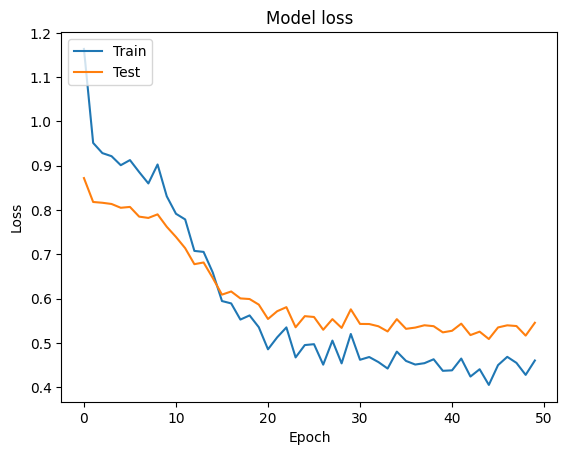

Accuracy: 0.6271186440677966
Precision: 0.4843437530937531
Recall: 0.5319611251580278
F1-Score: 0.5004956896551724
Cohen Kappa Score: 0.6600128055440473
-----------------------BiLSTM-----------------------


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_34 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_35 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_779 (Dropout)       (None, 200)               0         
                                                                 
 dense_55 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

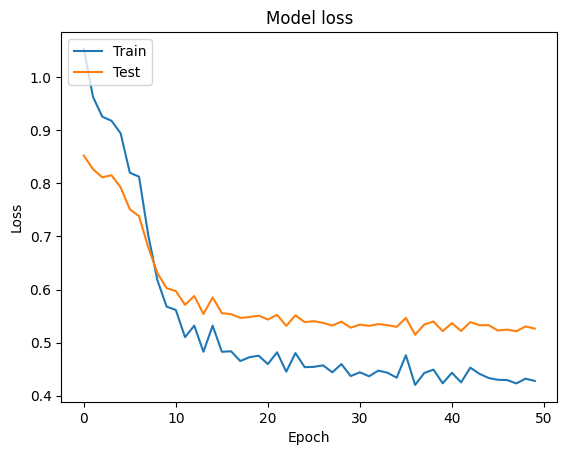

Accuracy: 0.5480225988700564
Precision: 0.4030394519116324
Recall: 0.5374367888748419
F1-Score: 0.4537716241824072
Cohen Kappa Score: 0.6151349033779439
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_34 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_35 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_17 (Gl  (None, 128)              0  

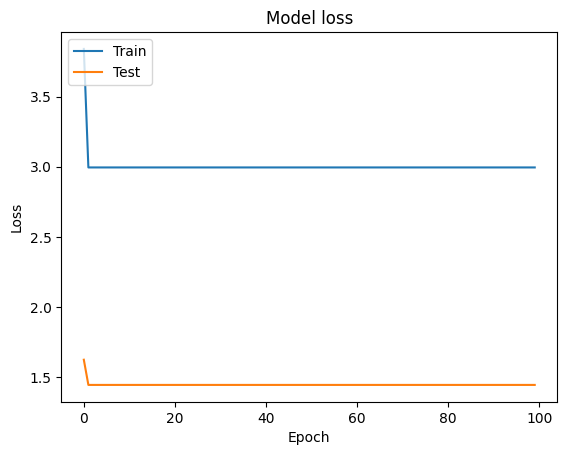

Accuracy: 0.17231638418079095
Precision: 0.04307909604519774
Recall: 0.25
F1-Score: 0.07349397590361446
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.6271186440677966
Precision: 0.6219551106485539
Recall: 0.5601776388054134
F1-Score: 0.5771055286972436
Cohen Kappa Score: 0.6766297872340425


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.6271186440677966
Precision: 0.641290072473112
Recall: 0.55749466332304
F1-Score: 0.5815057905433805
Cohen Kappa Score: 0.694154559716254


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.5423728813559322
Precision: 0.5139906728847434
Recall: 0.460258207083791
F1-Score: 0.4403669457445892
Cohen Kappa Score: 0.5899584307612367


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.5903954802259888
Precision: 0.5880328600916837
Recall: 0.5680405587448966
F1-Score: 0.5764289983740656
Cohen Kappa Score: 0.67819

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:10<00:00,  2.25it/s]


-----------------------LSTM-----------------------


Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_78 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_79 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_817 (Dropout)       (None, 128)               0         
                                                                 
 dense_57 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 6s 37ms/step - loss: 1.2052 - mae: 0.8913
Epoch 2/50
12/12 [==============================] - 0s 38ms/step - loss: 0.8688 -

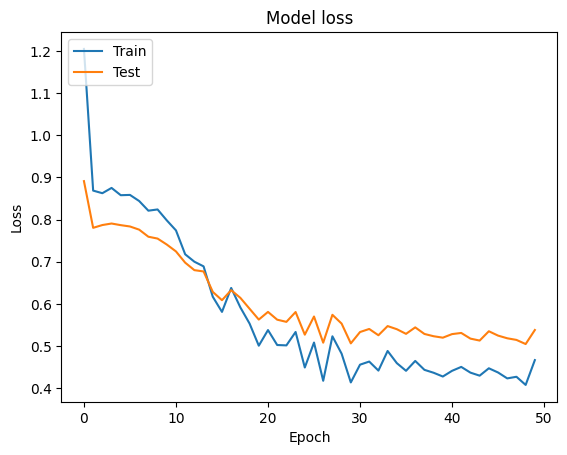

Accuracy: 0.4915254237288136
Precision: 0.37947248415254764
Recall: 0.4798751361251361
F1-Score: 0.4222434420932275
Cohen Kappa Score: 0.5863627750859433
-----------------------BiLSTM-----------------------


Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_36 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_37 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_818 (Dropout)       (None, 200)               0         
                                                                 
 dense_58 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

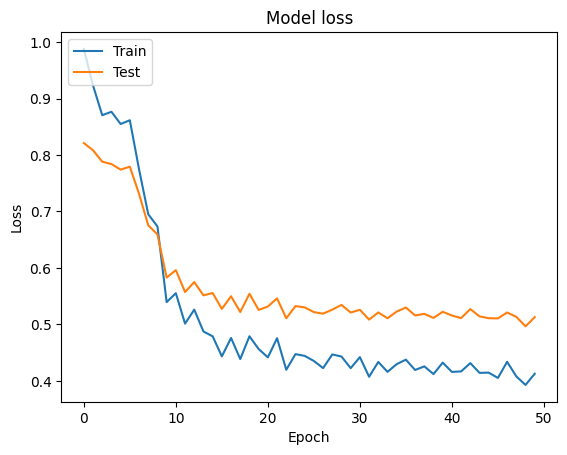

Accuracy: 0.4830508474576271
Precision: 0.24157204541819927
Recall: 0.3986269923769924
F1-Score: 0.3004078101828967
Cohen Kappa Score: 0.5329352444901448
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_36 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_37 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_18 (Gl  (None, 128)              0 

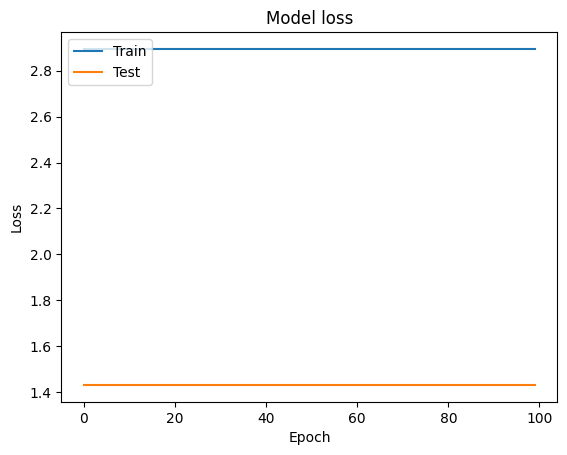

Accuracy: 0.21468926553672316
Precision: 0.05367231638418079
Recall: 0.25
F1-Score: 0.08837209302325581
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.5875706214689266
Precision: 0.6311570490578124
Recall: 0.5635473168367906
F1-Score: 0.56768856210698
Cohen Kappa Score: 0.7136472072170885


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.5225988700564972
Precision: 0.5229915427542275
Recall: 0.5298224771908983
F1-Score: 0.5161827630620259
Cohen Kappa Score: 0.6444842351109381


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.3389830508474576
Precision: 0.5051623774509804
Recall: 0.28339869293816666
F1-Score: 0.19545884657628892
Cohen Kappa Score: 0.12414709686606307


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.5536723163841808
Precision: 0.5619566180183309
Recall: 0.5342531658321132
F1-Score: 0.5368400153141056
Cohen Kappa Score: 0

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:10<00:00,  2.25it/s]


-----------------------LSTM-----------------------


Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_82 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_83 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_856 (Dropout)       (None, 128)               0         
                                                                 
 dense_60 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 23ms/step - loss: 1.1377 - mae: 0.8723
Epoch 2/50
12/12 [==============================] - 0s 25ms/step - loss: 0.9468 -

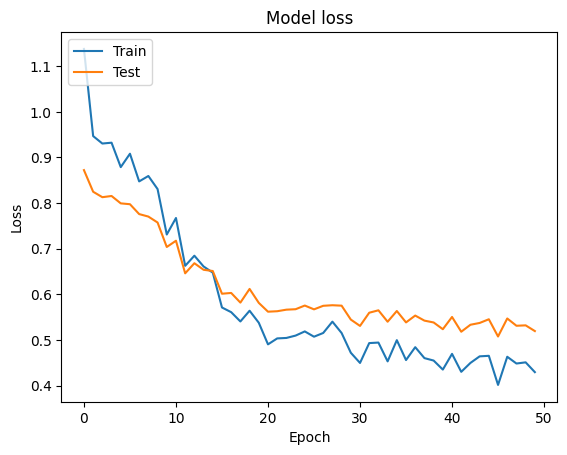

Accuracy: 0.6016949152542372
Precision: 0.48407917383821
Recall: 0.47148926386260814
F1-Score: 0.43936975449054827
Cohen Kappa Score: 0.6020714480643526
-----------------------BiLSTM-----------------------


Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_38 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_39 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_857 (Dropout)       (None, 200)               0         
                                                                 
 dense_61 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

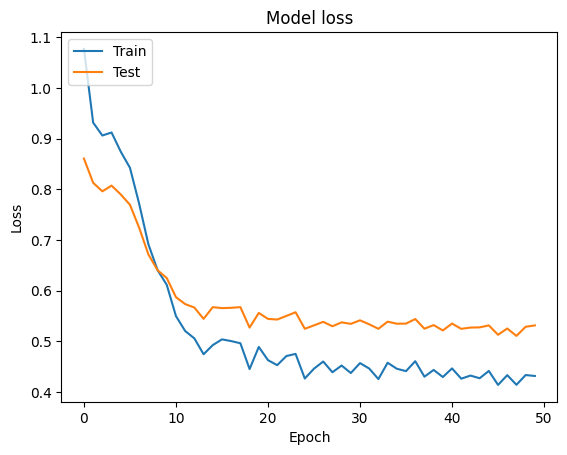

Accuracy: 0.4943502824858757
Precision: 0.3820707070707071
Recall: 0.4872290752177964
F1-Score: 0.4091717008088376
Cohen Kappa Score: 0.5766662740870259
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_38 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_39 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_19 (Gl  (None, 128)              0  

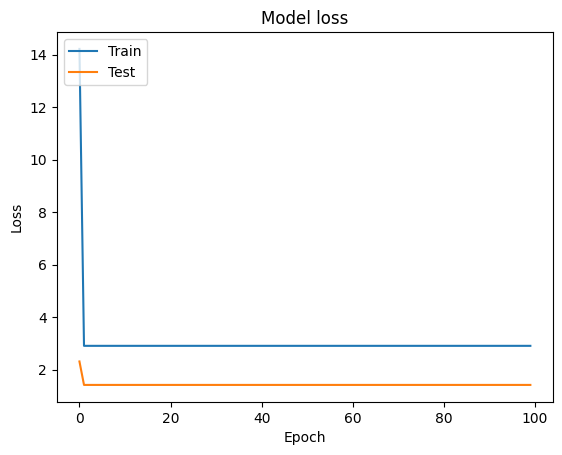

Accuracy: 0.14689265536723164
Precision: 0.03672316384180791
Recall: 0.25
F1-Score: 0.06403940886699508
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.6497175141242938
Precision: 0.6345312229718042
Recall: 0.6117948354677663
F1-Score: 0.6141158079496837
Cohen Kappa Score: 0.7182774781147758


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.5451977401129944
Precision: 0.5467056996061191
Recall: 0.5875685196938474
F1-Score: 0.5412590955144146
Cohen Kappa Score: 0.6930319852388004


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.403954802259887
Precision: 0.4843820669380371
Recall: 0.46427333844129376
F1-Score: 0.4282813459832093
Cohen Kappa Score: 0.5950087798648434


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.559322033898305
Precision: 0.5318214573308242
Recall: 0.5555652094325361
F1-Score: 0.5408546809007365
Cohen Kappa Score: 0.6

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:05<00:00,  4.30it/s]


-----------------------LSTM-----------------------


Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_86 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_87 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_895 (Dropout)       (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 7s 27ms/step - loss: 1.8111 - mae: 1.0747
Epoch 2/50
12/12 [==============================] - 0s 27ms/step - loss: 0.9801 -

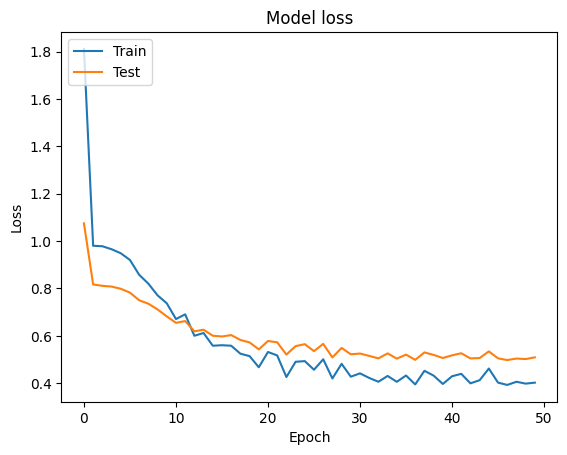

Accuracy: 0.2742382271468144
Precision: 0.17302970655685743
Recall: 0.2461644524959742
F1-Score: 0.1849614155626747
Cohen Kappa Score: 0.47311226226036973
-----------------------BiLSTM-----------------------


Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_40 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_41 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_896 (Dropout)       (None, 200)               0         
                                                                 
 dense_64 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

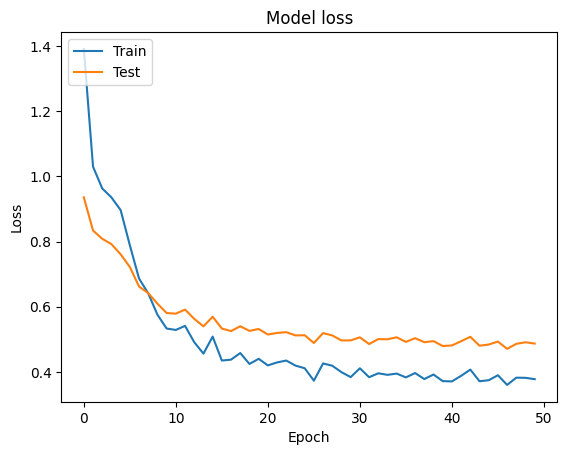

Accuracy: 0.48753462603878117
Precision: 0.4035101110111011
Recall: 0.32198297676558546
F1-Score: 0.3070933472632467
Cohen Kappa Score: 0.5718633220703081
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_40 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_41 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_20 (Gl  (None, 128)              0

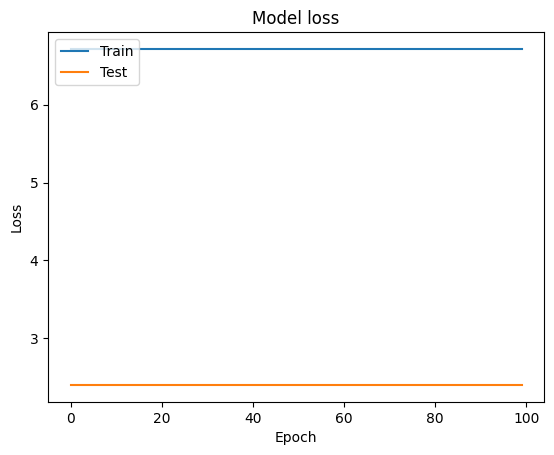

Accuracy: 0.002770083102493075
Precision: 0.000554016620498615
Recall: 0.2
F1-Score: 0.0011049723756906076
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.5484764542936288
Precision: 0.43170542754298236
Recall: 0.43861283643892335
F1-Score: 0.41119615141475646
Cohen Kappa Score: 0.6949467635626161


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.5429362880886427
Precision: 0.4733945626867587
Recall: 0.44455695019553715
F1-Score: 0.40545730204144687
Cohen Kappa Score: 0.7199820453355279


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.3684210526315789
Precision: 0.3118440377791357
Recall: 0.3010176558546124
F1-Score: 0.25109796596097966
Cohen Kappa Score: 0.5311781982377974


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.5263157894736842
Precision: 0.6327795304460642
Recall: 0.6309530998389694
F1-Score: 0.6137587253648089
Cohen Kappa 

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:07<00:00,  3.27it/s]


-----------------------LSTM-----------------------


Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_90 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_91 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_934 (Dropout)       (None, 128)               0         
                                                                 
 dense_66 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 8s 28ms/step - loss: 1.9882 - mae: 1.0986
Epoch 2/50
12/12 [==============================] - 0s 28ms/step - loss: 0.9773 -

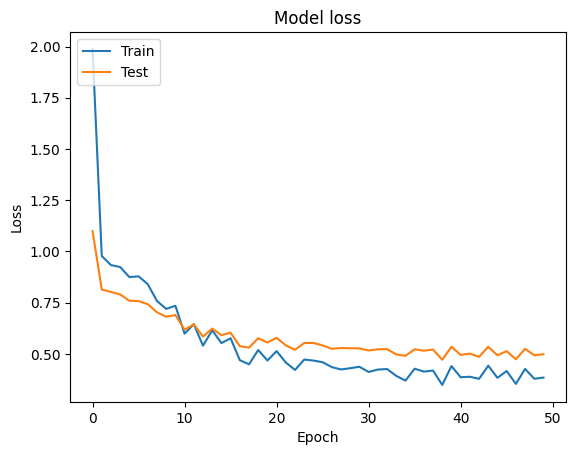

Accuracy: 0.48476454293628807
Precision: 0.2949132521225544
Recall: 0.40436891764468663
F1-Score: 0.33911218009578664
Cohen Kappa Score: 0.6352474255136848
-----------------------BiLSTM-----------------------


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_42 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_43 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_935 (Dropout)       (None, 200)               0         
                                                                 
 dense_67 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

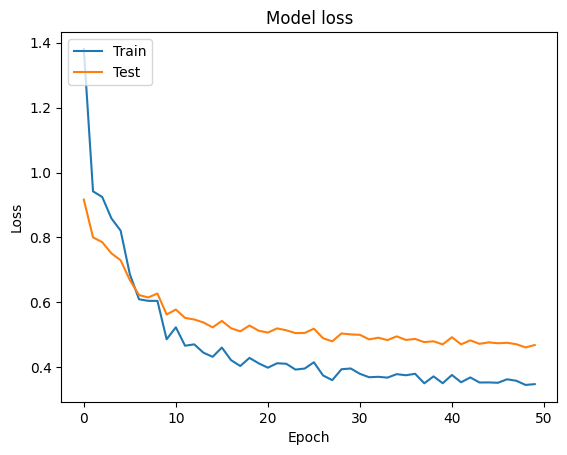

Accuracy: 0.6371191135734072
Precision: 0.538907875749981
Recall: 0.49902506006121766
F1-Score: 0.5102357848224415
Cohen Kappa Score: 0.7642185593234905
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_42 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_43 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_21 (Gl  (None, 128)              0  

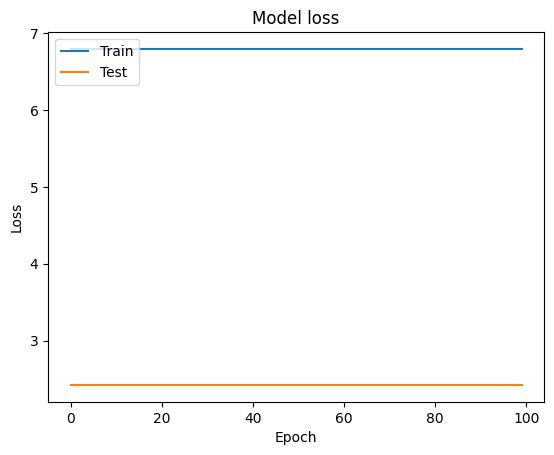

Accuracy: 0.019390581717451522
Precision: 0.0038781163434903044
Recall: 0.2
F1-Score: 0.0076086956521739125
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.6454293628808865
Precision: 0.5356325168032372
Recall: 0.5048707968567656
F1-Score: 0.5139940849125244
Cohen Kappa Score: 0.7792159918231247


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.6094182825484764
Precision: 0.5059943635573888
Recall: 0.48858370447685073
F1-Score: 0.49216175889544206
Cohen Kappa Score: 0.7558781460427793


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.5096952908587258
Precision: 0.4036603773584906
Recall: 0.32652663041222135
F1-Score: 0.26307196168235797
Cohen Kappa Score: 0.5561371460689946


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.592797783933518
Precision: 0.5606723845965852
Recall: 0.48568278252573993
F1-Score: 0.5073702810412943
Cohen Kappa S

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:10<00:00,  2.25it/s]


-----------------------LSTM-----------------------


Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_94 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_95 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_973 (Dropout)       (None, 128)               0         
                                                                 
 dense_69 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 8s 25ms/step - loss: 1.8097 - mae: 1.0695
Epoch 2/50
12/12 [==============================] - 0s 29ms/step - loss: 0.9831 -

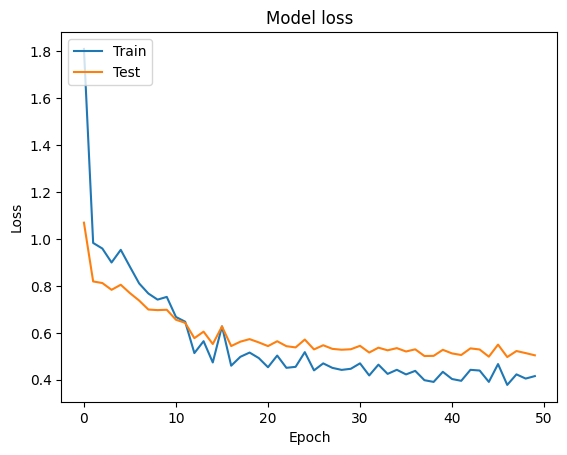

Accuracy: 0.6011080332409973
Precision: 0.3735118575432711
Recall: 0.41586762422360246
F1-Score: 0.3839635633781072
Cohen Kappa Score: 0.6286242153219542
-----------------------BiLSTM-----------------------


Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_44 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_45 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_974 (Dropout)       (None, 200)               0         
                                                                 
 dense_70 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

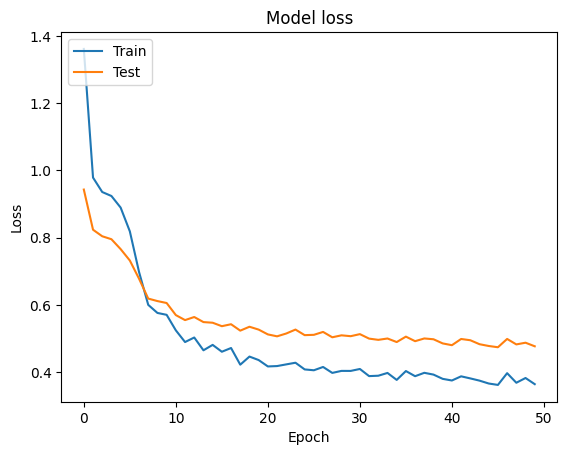

Accuracy: 0.518005540166205
Precision: 0.4613628860409976
Recall: 0.3480191276115189
F1-Score: 0.3217832379356881
Cohen Kappa Score: 0.5536557654607022
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_44 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_45 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_22 (Gl  (None, 128)              0   

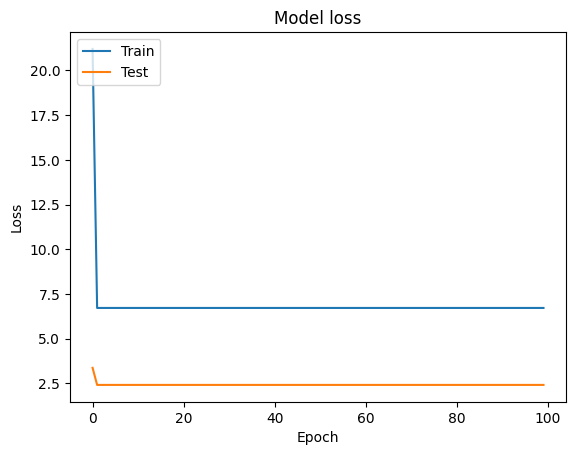

Accuracy: 0.019390581717451522
Precision: 0.0038781163434903044
Recall: 0.2
F1-Score: 0.0076086956521739125
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.5013850415512465
Precision: 0.3848951796223468
Recall: 0.4213541078486731
F1-Score: 0.3824471944327336
Cohen Kappa Score: 0.6814720635846986


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.4903047091412742
Precision: 0.3881296481296482
Recall: 0.4427080392433654
F1-Score: 0.3802379823228953
Cohen Kappa Score: 0.7097650020428875


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.5817174515235457
Precision: 0.4105245890882845
Recall: 0.36546689723320164
F1-Score: 0.33046103377038627
Cohen Kappa Score: 0.6189544344030931


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.5844875346260388
Precision: 0.6599218790729381
Recall: 0.5126076369282891
F1-Score: 0.5131019665212861
Cohen Kappa Sco

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
100%|██████████| 23/23 [00:05<00:00,  4.15it/s]


-----------------------LSTM-----------------------


Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_98 (LSTM)              (None, 1, 400)            1870400   
                                                                 
 lstm_99 (LSTM)              (None, 128)               270848    
                                                                 
 dropout_1012 (Dropout)      (None, 128)               0         
                                                                 
 dense_72 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,141,377
Trainable params: 2,141,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 7s 29ms/step - loss: 1.8196 - mae: 1.0532
Epoch 2/50
12/12 [==============================] - 0s 29ms/step - loss: 1.0122 -

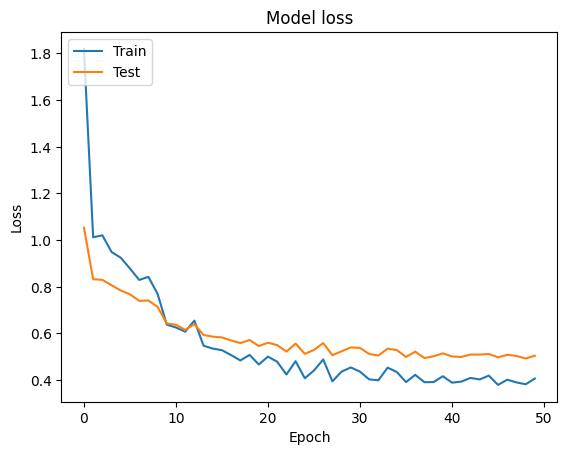

Accuracy: 0.296398891966759
Precision: 0.18858368452739313
Recall: 0.26797466241955026
F1-Score: 0.19403624135998504
Cohen Kappa Score: 0.42586265609388274
-----------------------BiLSTM-----------------------


Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_46 (Bidirecti  (None, 1, 600)           2565600   
 onal)                                                           
                                                                 
 bidirectional_47 (Bidirecti  (None, 200)              560800    
 onal)                                                           
                                                                 
 dropout_1013 (Dropout)      (None, 200)               0         
                                                                 
 dense_73 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3,126,601
Trainable params: 3,126,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [=========================

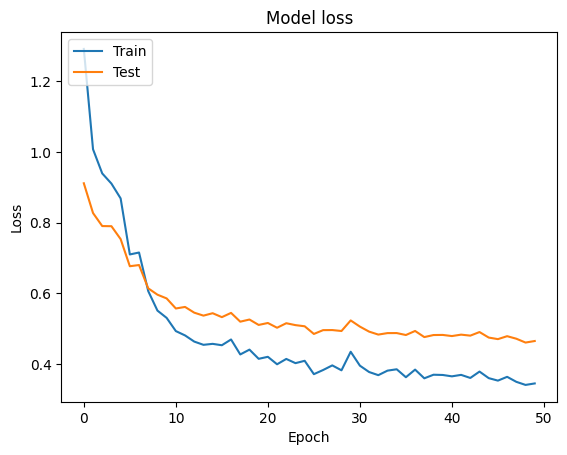

Accuracy: 0.5373961218836565
Precision: 0.44053313896084667
Recall: 0.3914561272393502
F1-Score: 0.3967348783456885
Cohen Kappa Score: 0.5912811726632401
-----------------------CNN-----------------------
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 768, 1)]          0         
                                                                 
 conv1d_46 (Conv1D)          (None, 768, 64)           256       
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_47 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 global_max_pooling1d_23 (Gl  (None, 128)              0 

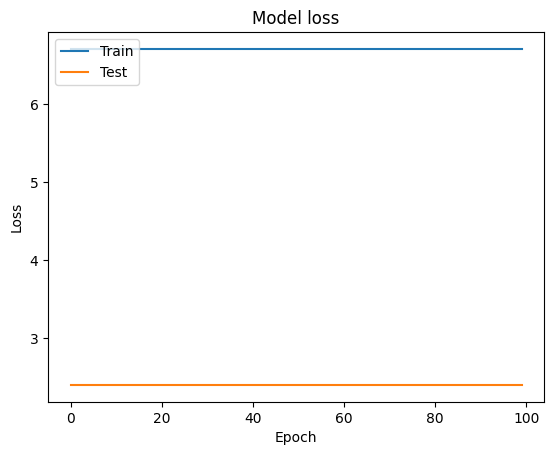

Accuracy: 0.013850415512465374
Precision: 0.002770083102493075
Recall: 0.2
F1-Score: 0.005464480874316939
Cohen Kappa Score: 0.0

-----------------------Logistic Regression-----------------------
Accuracy: 0.5512465373961218
Precision: 0.6212668564802128
Recall: 0.4983765373424564
F1-Score: 0.48945260630583787
Cohen Kappa Score: 0.6688023171175542


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.4598337950138504
Precision: 0.3989579954427318
Recall: 0.43110487426745714
F1-Score: 0.38067157090503206
Cohen Kappa Score: 0.6248405540204716


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.5734072022160664
Precision: 0.3774728997289973
Recall: 0.34412599133646304
F1-Score: 0.31811909135001465
Cohen Kappa Score: 0.5841834299569172


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.5872576177285319
Precision: 0.4648957590843982
Recall: 0.4803673513811594
F1-Score: 0.4631461689856816
Cohen Kappa Sc

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.
 70%|███████   | 64/91 [00:20<00:08,  3.21it/s]

In [ ]:
# final_lstm=[]
# final_bilstm=[]
# final_cnn=[]
# final_logistic_reg=[]
# final_random_forest=[]
# final_adaboost=[]
# final_k_neighbors=[]
# final_svc=[]
# for sets in range(1,9):
#   df_essay_set = df[df.essay_set == sets]
#   X, y = dataset_preparation(df_essay_set)
#   # X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, random_state = 101, test_size = 0.2,)
#   print(" -------------------------------------------------")
#   print(" -------------------------------------------------")
#   print("\n--------SET {}--------\n".format(sets))
#   print(" -------------------------------------------------")
#   print(" -------------------------------------------------")
  
#   start_time = time.time()

#   cv = KFold(n_splits=5, shuffle=True)
#   cv_data = cv.split(X)
#   fold_count =1

#   lstm= [-2 for _ in range(5)]
#   bilstm= [-2 for _ in range(5)]
#   cnn= [-2 for _ in range(5)]
#   logistic_reg= [-2 for _ in range(5)]
#   random_forest= [-2 for _ in range(5)]
#   adaboost= [-2 for _ in range(5)]
#   k_neighbors= [-2 for _ in range(5)]
#   svc= [-2 for _ in range(5)]


#   for traincv, testcv in cv_data:
#     print("\n--------Fold {}--------\n".format(fold_count))
#     tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
#     tokenizer.pad_token = tokenizer.eos_token
#     model = TFGPT2Model.from_pretrained('gpt2')
#     X_train, X_test, y_train, y_test = X.iloc[traincv], X.iloc[testcv], y.iloc[traincv], y.iloc[testcv]

#     BATCH_SIZE = 16
#     MAX_LENGTH = 300

#     train_encodings = tokenizer(list(X_train['preprocessed_text']), truncation=True, padding=True, max_length=MAX_LENGTH, return_tensors='tf')
#     train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).batch(BATCH_SIZE)

#     test_encodings = tokenizer(list(X_test['preprocessed_text']), truncation=True, padding=True, max_length=MAX_LENGTH, return_tensors='tf')
#     test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).batch(BATCH_SIZE)

#     embeddings_train = []
#     for batch in tqdm(train_dataset):
#         embeddings_train.append(model(batch[0]['input_ids'])[0][:, -1, :])
#     embeddings_train = tf.concat(embeddings_train, axis=0)

#     embeddings_test = []
#     for batch in tqdm(test_dataset):
#         embeddings_test.append(model(batch[0]['input_ids'])[0][:, -1, :])
#     embeddings_test = tf.concat(embeddings_test, axis=0)

#     temp_lstm=[]
#     temp_bilstm=[]
#     temp_cnn=[]
#     temp_logistic_reg=[]
#     temp_random_forest=[]
#     temp_adaboost=[]
#     temp_k_neighbors=[]
#     temp_svc=[]

#     #LSTM (N,1,L)
#     print("-----------------------LSTM-----------------------")

#     trainDataVectors=tf.reshape(embeddings_train,[embeddings_train.shape[0],1,embeddings_train.shape[1]])
#     testDataVectors=tf.reshape(embeddings_test,[embeddings_test.shape[0],1,embeddings_test.shape[1]]) 
#     lstm_model = get_model(bidirectional=False)
#     history= lstm_model.fit(trainDataVectors, y_train, batch_size=128, epochs=50)
#     y_pred = lstm_model.predict(testDataVectors)
#     y_pred = np.around(y_pred)
#     np.nan_to_num(y_pred)
#     plot_accuracy_curve(history)
#     temp_lstm =list(print_metrics_function(y_test, y_pred))
#     lstm= max_list(lstm, temp_lstm)
    
    
#     #BiLSTM
#     print("-----------------------BiLSTM-----------------------")

#     Hidden_dim1=300
#     Hidden_dim2=100
#     return_sequences = True
#     dropout=0.2
#     recurrent_dropout=0.2
#     input_size=768
#     activation='relu'
#     bidirectional = True
#     batch_size = 64
#     epoch = 50
#     lstm_model = get_model(Hidden_dim1=Hidden_dim1, Hidden_dim2=Hidden_dim2, return_sequences=return_sequences,
#                                 dropout=dropout, recurrent_dropout=recurrent_dropout, input_size=input_size,
#                                 activation=activation, bidirectional=bidirectional)
#     history = lstm_model.fit(trainDataVectors, y_train, batch_size=batch_size, epochs=epoch)
#     y_pred = lstm_model.predict(testDataVectors)
#     y_pred = np.around(y_pred)
#     np.nan_to_num(y_pred)
#     plot_accuracy_curve(history)
#     temp_bilstm =list(print_metrics_function(y_test, y_pred))
#     bilstm= max_list(bilstm, temp_bilstm)
    

#     #CNN
#     print("-----------------------CNN-----------------------")

#     trainDataVectors_=tf.reshape(trainDataVectors,[trainDataVectors.shape[0],trainDataVectors.shape[2],1])
#     testDataVectors_=tf.reshape(testDataVectors,[testDataVectors.shape[0],testDataVectors.shape[2],1])  
#     cnn_model = get_model_CNN(output_dims=1)
#     history=cnn_model.fit(trainDataVectors_, y_train, batch_size=128, epochs=100)
#     y_pred = cnn_model.predict(testDataVectors_)
#     y_pred = np.around(y_pred)
#     np.nan_to_num(y_pred)
#     plot_accuracy_curve(history)
#     temp_cnn =list(print_metrics_function(y_test, y_pred))
#     cnn= max_list(cnn, temp_cnn)
    
#     #New features from feature engineering

#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train.drop(['preprocessed_text'], axis = 1))
#     X_test_scaled = scaler.transform(X_test.drop(['preprocessed_text'], axis = 1))
#     X_train_features = tf.constant(X_train_scaled.astype('float32'))
#     X_test_features = tf.constant(X_test_scaled.astype('float32'))

#     embeddings_train = tf.concat([embeddings_train, X_train_features], axis = 1)
#     embeddings_test = tf.concat([embeddings_test, X_test_features], axis = 1)
#     print()
#     print("-----------------------Logistic Regression-----------------------")
#     model = choose_classifiers("logistic_regression")
#     model.fit(embeddings_train, y_train)
#     y_predictions = model.predict(embeddings_test)
#     temp_logistic_reg =list(print_metrics_function(y_test, y_predictions))
#     logistic_reg= max_list(logistic_reg, temp_logistic_reg)

#     print("\n")
#     print("-----------------------Random Forest Classifier-----------------------")
#     model = choose_classifiers("random_forest_classifier")
#     model.fit(embeddings_train, y_train)
#     y_predictions = model.predict(embeddings_test)
#     temp_random_forest =list(print_metrics_function(y_test, y_predictions))
#     random_forest= max_list(random_forest, temp_random_forest)
    
#     print("\n")
#     print("-----------------------Adaboost Classifier-----------------------")
#     model = choose_classifiers("adaboost_classifier")
#     model.fit(embeddings_train, y_train)
#     y_predictions = model.predict(embeddings_test)
#     temp_adaboost =list(print_metrics_function(y_test, y_predictions))
#     adaboost= max_list(adaboost, temp_adaboost)
    

#     print("\n")
#     print("-----------------------K Neibhors Classifier-----------------------")
#     model = choose_classifiers("k_neighbors_classifier")
#     model.fit(embeddings_train, y_train)
#     y_predictions = model.predict(embeddings_test)
#     temp_k_neighbors =list(print_metrics_function(y_test, y_predictions))
#     k_neighbors= max_list(k_neighbors, temp_k_neighbors)
    

#     print("\n")
#     print("-----------------------Support Vector Classifier-----------------------")
#     model = choose_classifiers("support_vector_classifier")
#     model.fit(embeddings_train, y_train)
#     y_predictions = model.predict(embeddings_test)
#     temp_svc =list(print_metrics_function(y_test, y_predictions))
#     svc= max_list(svc, temp_svc)

#     fold_count+=1

#   end_time = time.time()
#   time_taken = end_time - start_time

#   print("Time taken: {:.5f} seconds".format(time_taken))

  
#   # Define the metric names and their corresponding values
#   metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]

#   metrics_list=[lstm, bilstm, cnn, logistic_reg, random_forest, adaboost, k_neighbors, svc]
#   # Define the ML model names
#   model_names = ["LSTM","BiLSTM","CNN","Logistic Regression", "Random Forest Classifier", "Adaboost Classifier", 
#                 "K Neighbors Classifier", "Support Vector Classifier"]

#   # Create a PrettyTable object with the metric names as column headers
#   table = PrettyTable(["Model"] + metric_names)

#   # Add the metric values for each model as rows to the table
#   for i, model_name in enumerate(model_names):
#       row = [model_name]
#       for j in range(len(metric_names)):
#           value = metrics_list[i][j]

#           # Format the value with three decimal places
#           value_formatted = f"{value:.3f}"
#           row.append(value_formatted)

#       table.add_row(row)

#   # Print the formatted table
#   print(table.get_string())
#   final_lstm.append(lstm[4])
#   final_bilstm.append(bilstm[4])
#   final_cnn.append(cnn[4])
#   final_logistic_reg.append(logistic_reg[4])
#   final_random_forest.append(random_forest[4])
#   final_adaboost.append(adaboost[4])
#   final_k_neighbors.append(k_neighbors[4])
#   final_svc.append(svc[4])




In [22]:
# Define the metric names and their corresponding values
metric_names = ["Prompt-1","Prompt-2","Prompt-3","Prompt-4","Prompt-5","Prompt-6","Prompt-7","Prompt-8"]

metrics_list=[final_lstm, final_bilstm, final_cnn, final_logistic_reg, final_random_forest, final_adaboost, final_k_neighbors, final_svc]
# Define the ML model names
model_names = ["LSTM","BiLSTM","CNN","Logistic Regression", "Random Forest Classifier", "Adaboost Classifier", 
              "K Neighbors Classifier", "Support Vector Classifier"]

table = PrettyTable(["Model"] + metric_names)

  # Add the metric values for each model as rows to the table
for i, model_name in enumerate(model_names):
    row = [model_name]
    for j in range(len(metric_names)):
        value = metrics_list[i][j]

        # Format the value with three decimal places
        value_formatted = f"{value:.3f}"
        row.append(value_formatted)

    table.add_row(row)

# Print the formatted table
print(table.get_string())


+---------------------------+----------+----------+----------+----------+----------+----------+----------+----------+
|           Model           | Prompt-1 | Prompt-2 | Prompt-3 | Prompt-4 | Prompt-5 | Prompt-6 | Prompt-7 | Prompt-8 |
+---------------------------+----------+----------+----------+----------+----------+----------+----------+----------+
|            LSTM           |  0.781   |  0.665   |  0.628   |  0.720   |  0.767   |  0.644   |  0.682   |  0.000   |
|           BiLSTM          |  0.799   |  0.667   |  0.653   |  0.697   |  0.799   |  0.684   |  0.703   |  0.464   |
|            CNN            |  0.736   |  0.652   |  0.679   |  0.674   |  0.757   |  0.670   |  0.635   |  0.383   |
|    Logistic Regression    |  0.799   |  0.691   |  0.702   |  0.737   |  0.786   |  0.691   |  0.642   |  0.535   |
|  Random Forest Classifier |  0.785   |  0.683   |  0.701   |  0.752   |  0.791   |  0.739   |  0.661   |  0.488   |
|    Adaboost Classifier    |  0.647   |  0.597   |  0.6

In [23]:
final_df = pd.DataFrame(metrics_list)
final_df.to_csv('DistilBERT.csv', index=False)

